## 1. Carga de librerias, modelos y herramientas

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilsforecast.preprocessing import fill_gaps
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [49]:
def pretreat_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].astype(float)
    return new_df

def pretreat_true_false_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].apply(lambda x: 1 if x == 'true' else 0)
    return new_df

In [50]:
# Load the data
data = pd.read_csv('../data/wot-data-db.interactions-datas_sewy207.csv')
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.round("min").dt.tz_localize(None)
df_test = data[['timestamp', 'data.value', 'interaction']]

df_temperature = pretreat_data_df(df_test, 'temperature')
df_brightness = pretreat_data_df(df_test, 'brightness')
df_humidity = pretreat_data_df(df_test, 'humidity')
df_airpressure = pretreat_data_df(df_test, 'airpressure')
df_co2 = pretreat_data_df(df_test, 'CO2')

len(df_temperature), len(df_brightness), len(df_humidity), len(df_airpressure), len(df_co2)

(33862, 31450, 82381, 69978, 157590)

In [51]:
df_temperature.head()

temperature
timestamp                       
2023-03-03 09:30:00         22.7
2023-03-03 09:31:00         22.5
2023-03-03 09:32:00         22.6
2023-03-03 09:34:00         22.7
2023-03-03 09:36:00         22.6

In [52]:
df_airpressure.head()

airpressure
timestamp                       
2023-03-03 09:30:00     104270.0
2023-03-03 09:31:00     104260.0
2023-03-03 09:32:00     104270.0
2023-03-03 09:33:00     104260.0
2023-03-03 09:34:00     104270.0

In [53]:
df_brightness.head()

brightness
timestamp                      
2023-03-03 09:29:00       146.0
2023-03-03 09:30:00       146.0
2023-03-03 09:36:00       140.0
2023-03-03 09:38:00       134.0
2023-03-03 09:40:00       140.0

In [54]:
df_co2.head()

CO2
timestamp                  
2023-03-03 09:30:00  503.04
2023-03-03 09:31:00  626.88
2023-03-03 09:32:00  511.04
2023-03-03 09:34:00  518.08
2023-03-03 09:35:00  519.04

In [55]:
df_humidity.head()

humidity
timestamp                    
2023-03-03 09:30:00      27.0
2023-03-03 09:31:00      26.8
2023-03-03 09:32:00      27.0
2023-03-03 09:33:00      26.9
2023-03-03 09:34:00      27.0

In [56]:
def plot_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df)
    plt.title('Sewy 207 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

def plot_hist(df, col_name):
    plt.figure(figsize=(10,6))
    plt.hist(df)
    plt.title('Sewy 207 ' + col_name)
    plt.ylabel('Frequency')
    plt.show()

def plot_day_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df[col_name].loc['2023-03-05'])
    plt.title('1 day Sewy 207 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

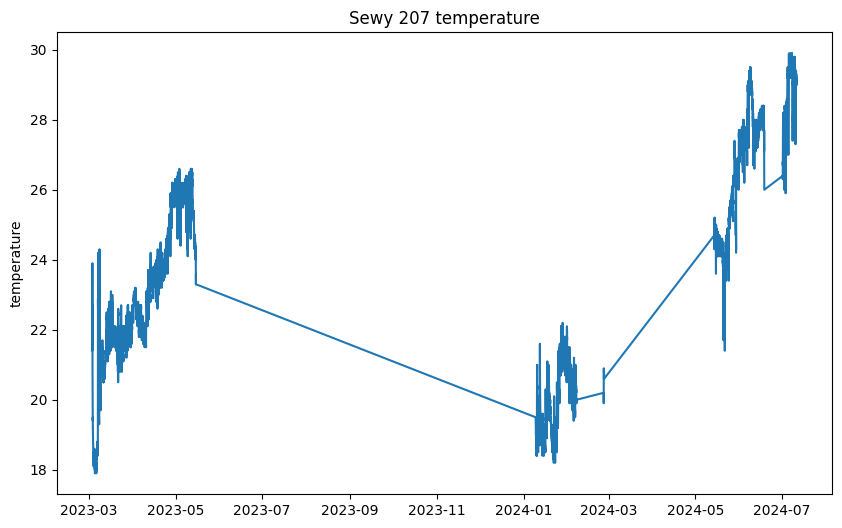

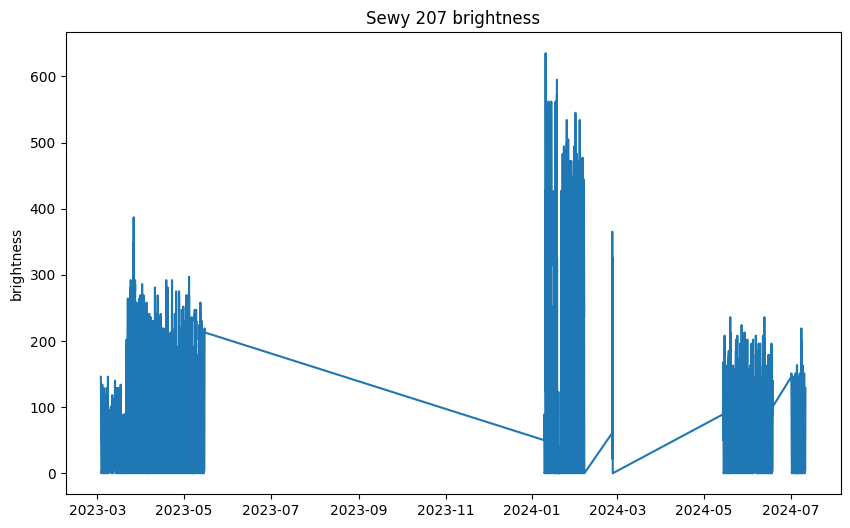

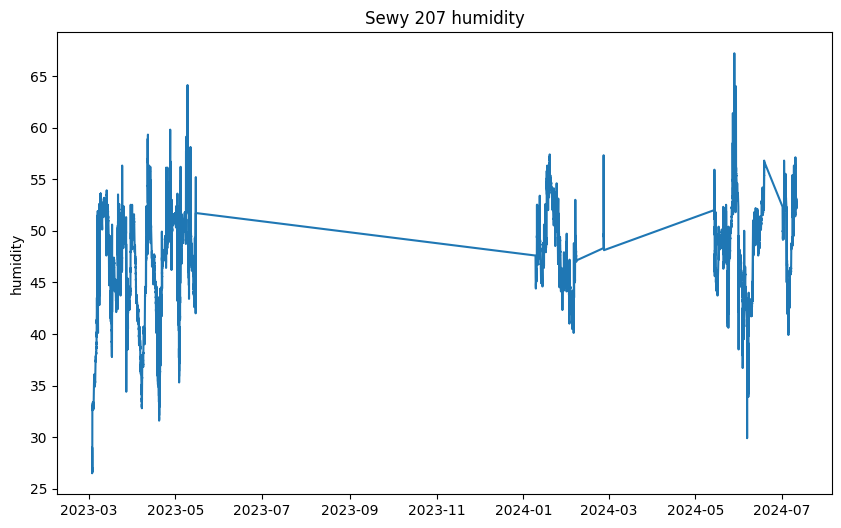

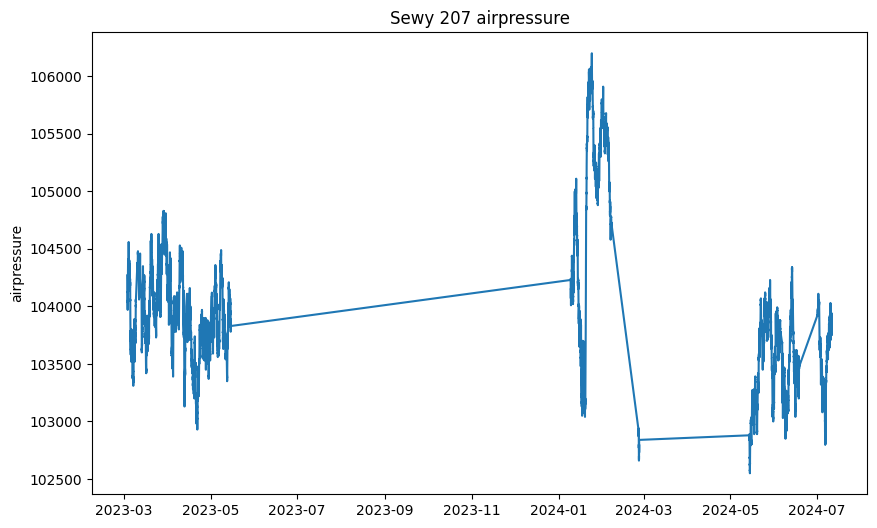

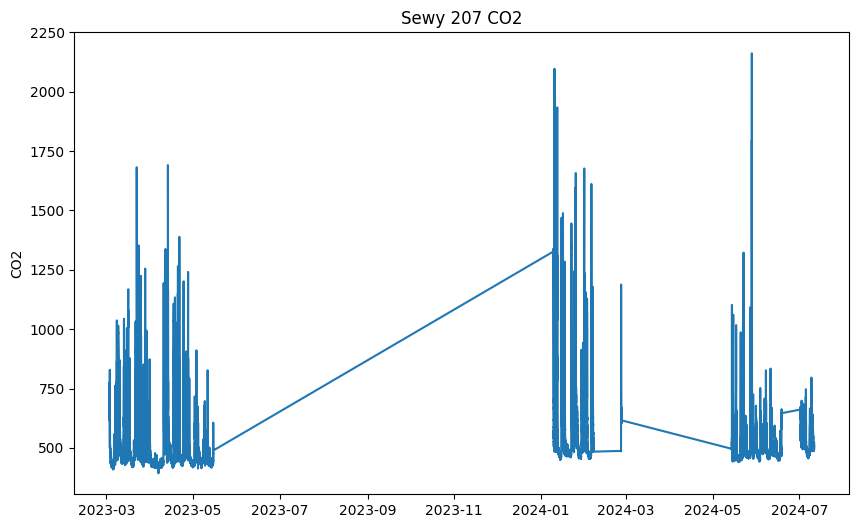

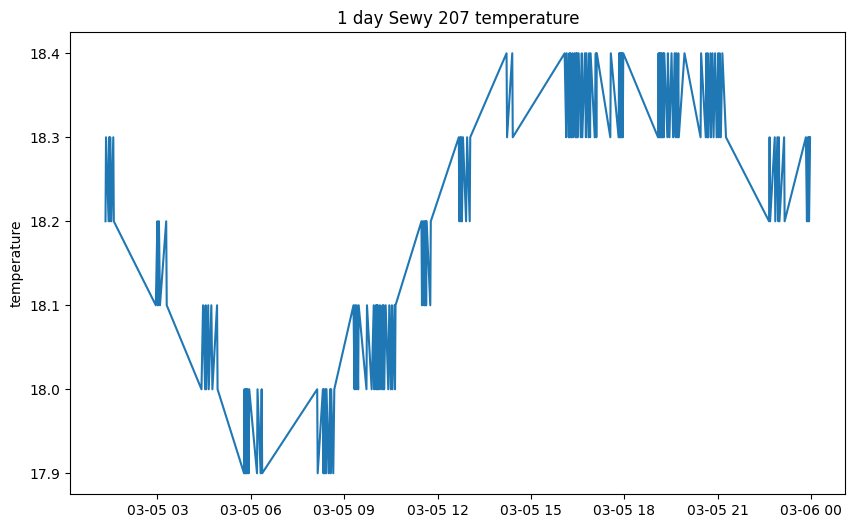

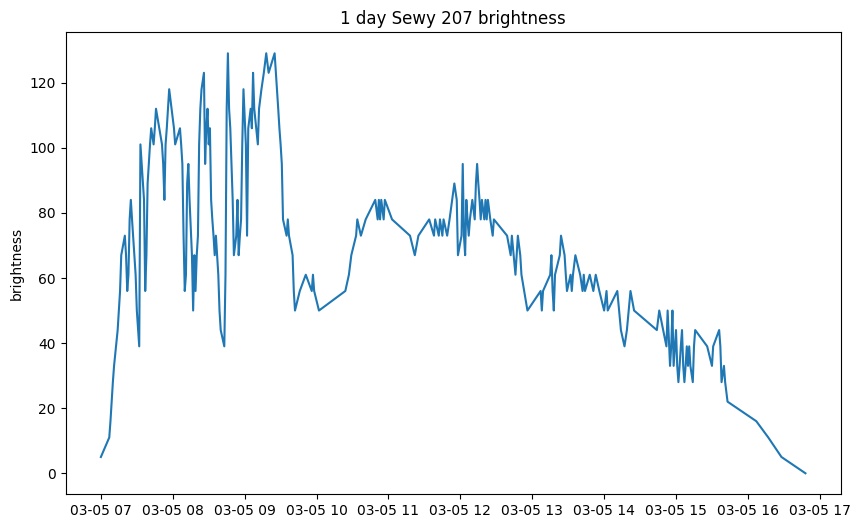

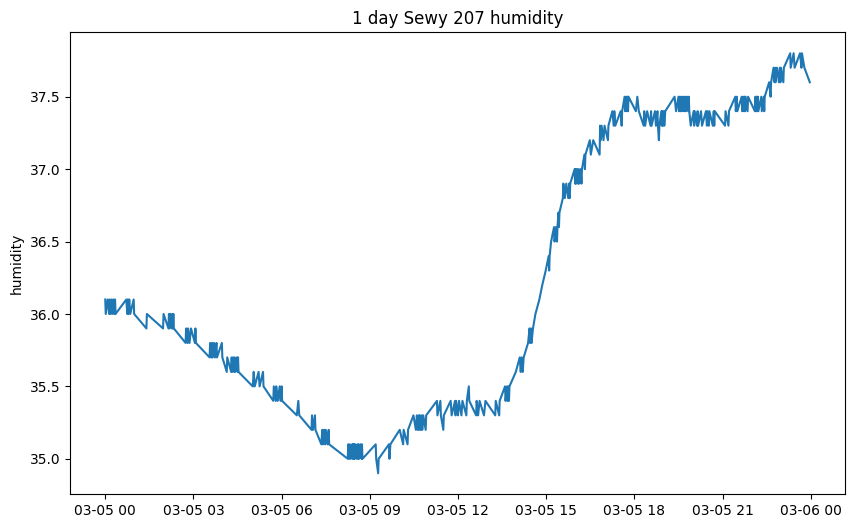

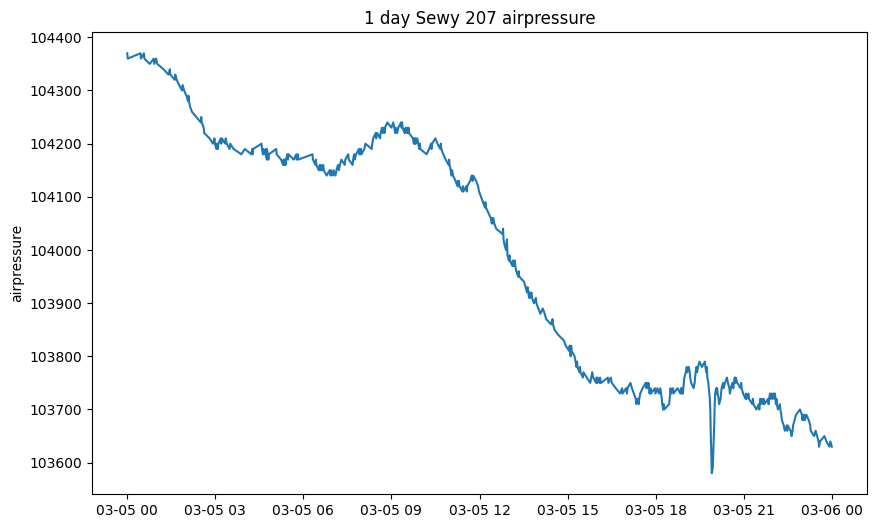

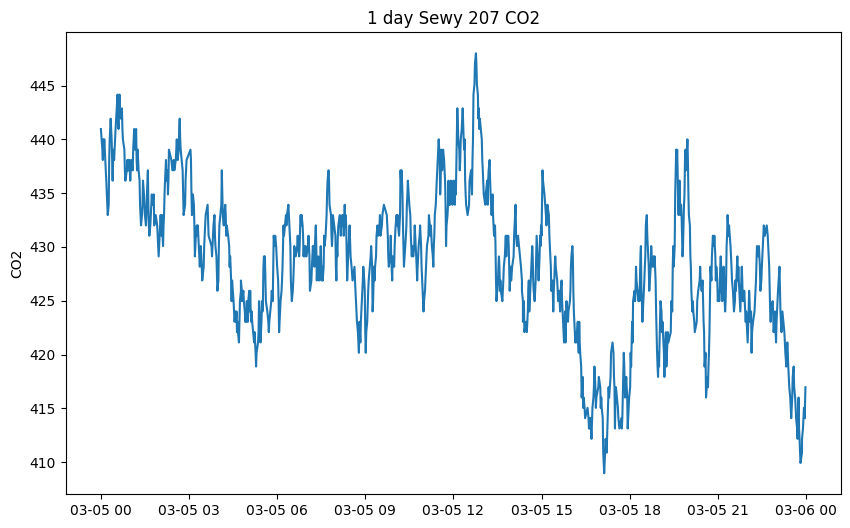

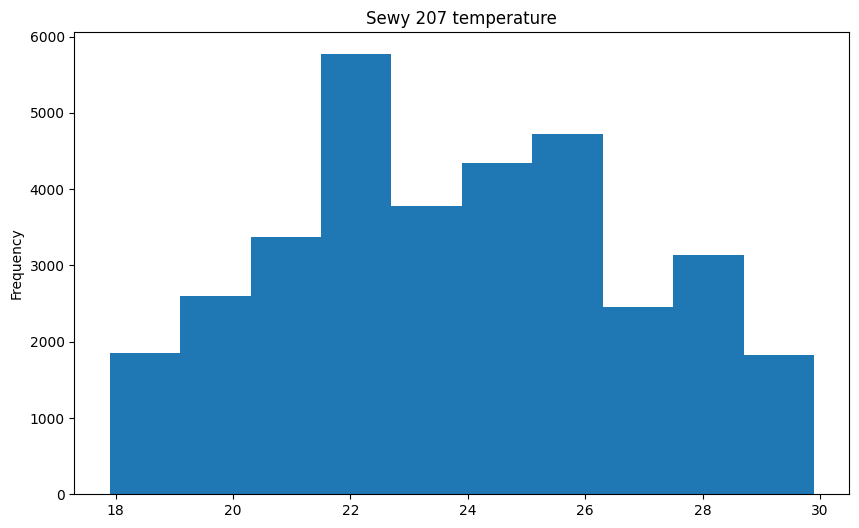

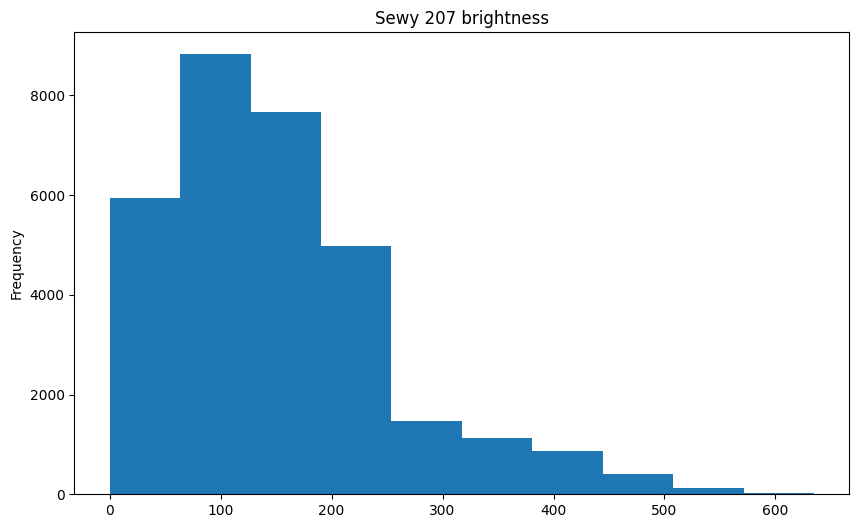

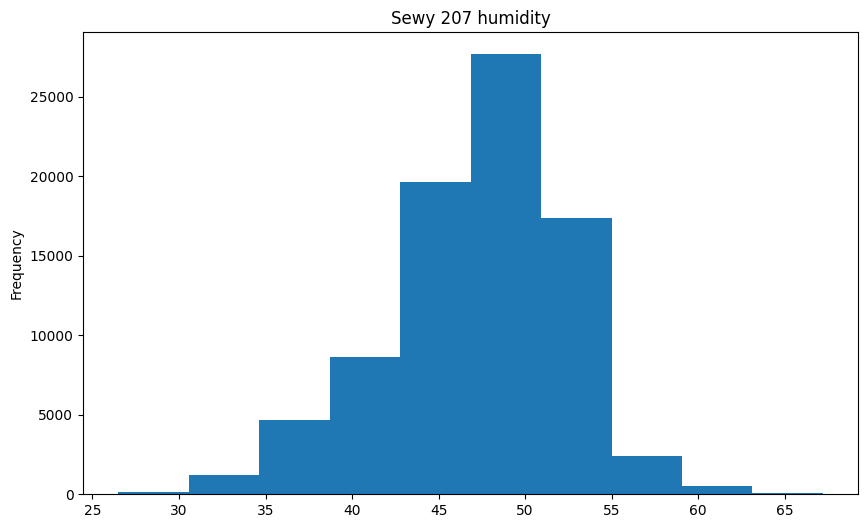

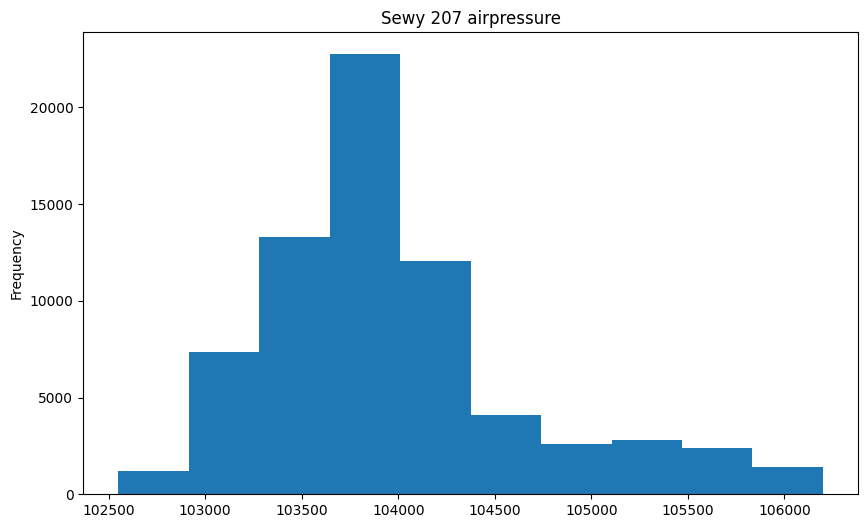

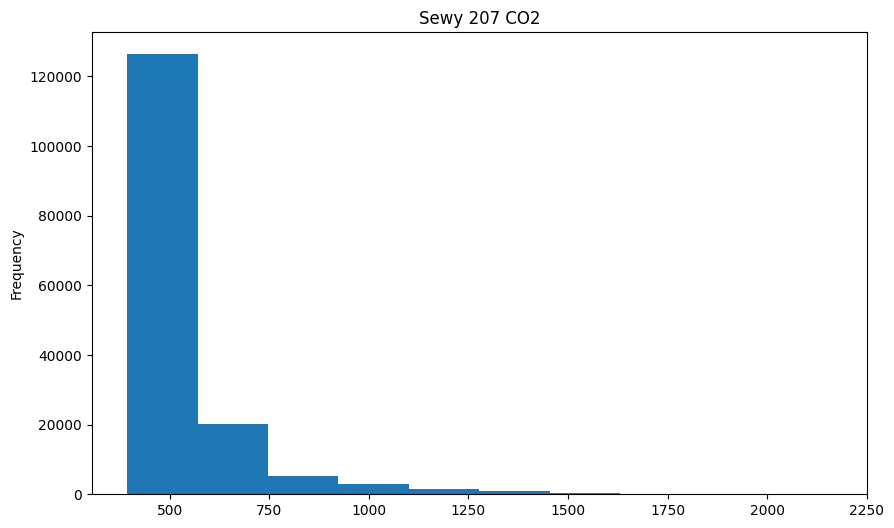

In [57]:
plot_data(df_temperature, 'temperature')
plot_data(df_brightness, 'brightness')
plot_data(df_humidity, 'humidity')
plot_data(df_airpressure, 'airpressure')
plot_data(df_co2, 'CO2')
plot_day_data(df_temperature, 'temperature')
plot_day_data(df_brightness, 'brightness')
plot_day_data(df_humidity, 'humidity')
plot_day_data(df_airpressure, 'airpressure')
plot_day_data(df_co2, 'CO2')
plot_hist(df_temperature, 'temperature')
plot_hist(df_brightness, 'brightness')
plot_hist(df_humidity, 'humidity')
plot_hist(df_airpressure, 'airpressure')
plot_hist(df_co2, 'CO2')

Debido a todos estos problemas, se ha optado por tomar únicamente el tramo entre marzo y mayo de 2023.

In [58]:
def reduce_df(df, start_date, end_date):
    return df[(df.index >= start_date) & (df.index <= end_date)]

In [59]:
reduced_df_temperature = reduce_df(df_temperature, '2023-03-01', '2023-05-15')
reduced_df_brightness = reduce_df(df_brightness, '2023-03-01', '2023-05-15')
reduced_df_humidity = reduce_df(df_humidity, '2023-03-01', '2023-05-15')
reduced_df_airpressure = reduce_df(df_airpressure, '2023-03-01', '2023-05-15')
reduced_df_co2 = reduce_df(df_co2, '2023-03-01', '2023-05-15')

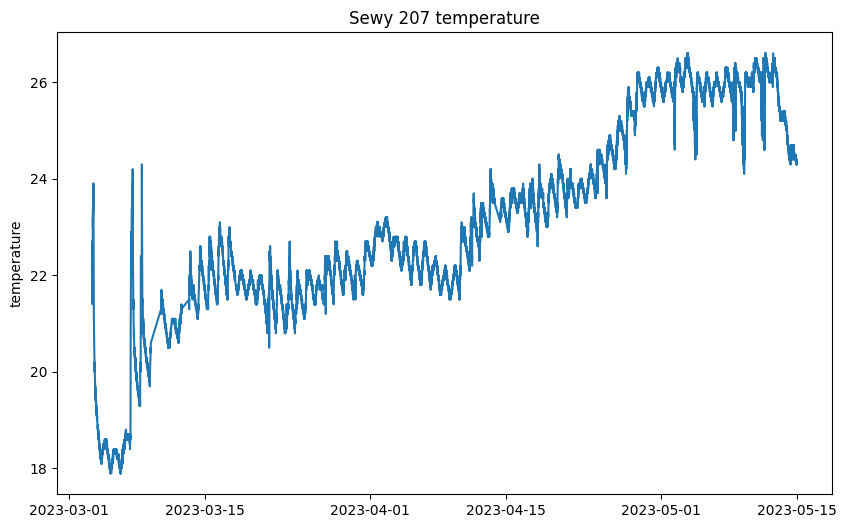

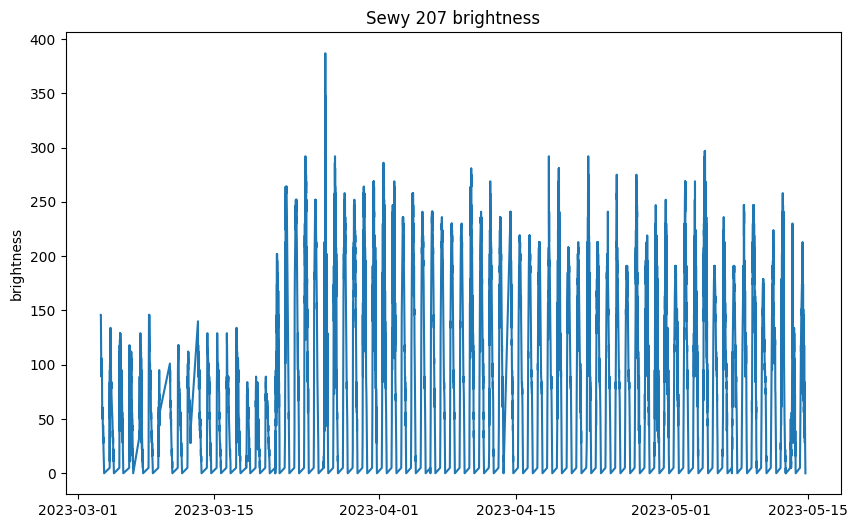

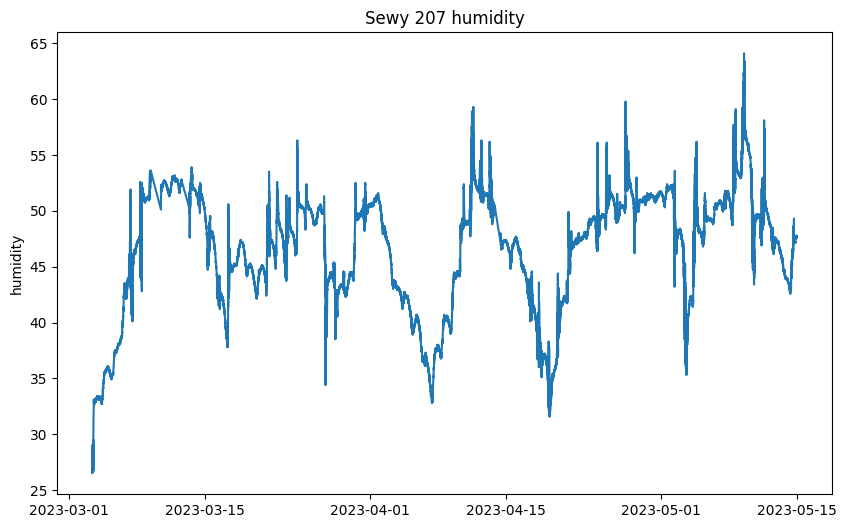

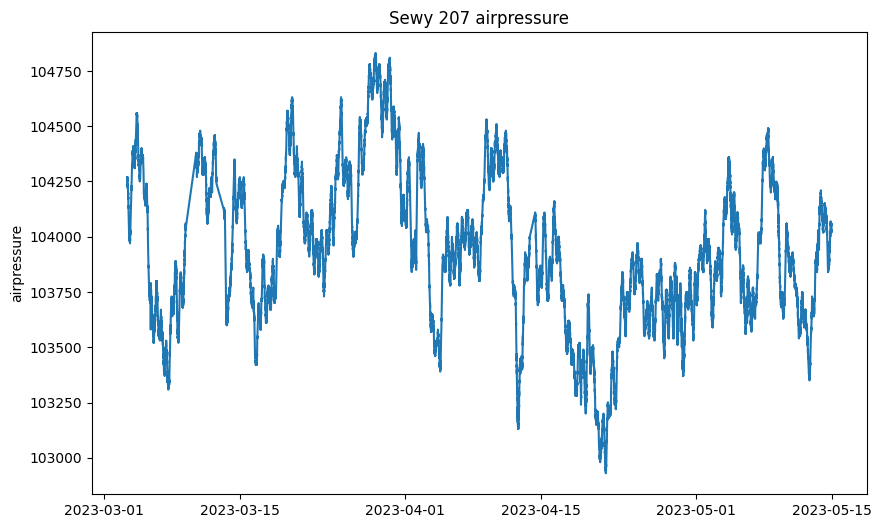

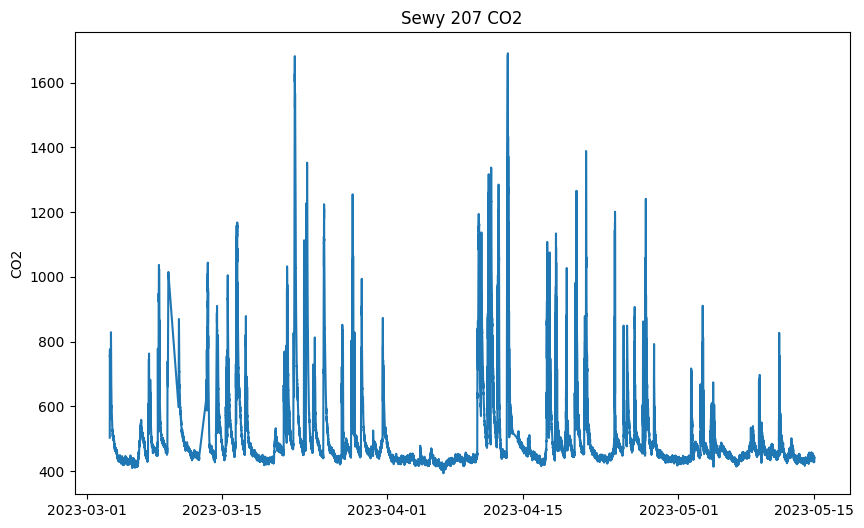

In [60]:
plot_data(reduced_df_temperature, 'temperature')
plot_data(reduced_df_brightness, 'brightness')
plot_data(reduced_df_humidity, 'humidity')
plot_data(reduced_df_airpressure, 'airpressure')
plot_data(reduced_df_co2, 'CO2')

Registros duplicados

In [61]:
def delete_duplicates(df, col_name):
    print(col_name + ' - Número de registros duplicados:', df.index.duplicated().sum())
    if df.index.duplicated().sum() > 0:
        df = df.groupby(df.index).mean()
        print(col_name + ' - Número de registros tras eliminar duplicados:' + str(len(df)))
    else:
        print('No hay registros duplicados')
    return df
    

In [62]:
reduced_df_temperature = delete_duplicates(reduced_df_temperature, 'temperature')
reduced_df_brightness = delete_duplicates(reduced_df_brightness, 'brightness')
reduced_df_humidity = delete_duplicates(reduced_df_humidity, 'humidity')
reduced_df_airpressure = delete_duplicates(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = delete_duplicates(reduced_df_co2, 'CO2')

temperature - Número de registros duplicados: 73
temperature - Número de registros tras eliminar duplicados:17321
brightness - Número de registros duplicados: 87
brightness - Número de registros tras eliminar duplicados:15678
humidity - Número de registros duplicados: 222
humidity - Número de registros tras eliminar duplicados:42158
airpressure - Número de registros duplicados: 156
airpressure - Número de registros tras eliminar duplicados:33990
CO2 - Número de registros duplicados: 542
CO2 - Número de registros tras eliminar duplicados:76390


In [63]:
def fill_gaps_df(df,col_name, boolean=False):
    print(col_name + " - Original data: ", len(df), "rows")
    
    # Rellenamos los valores faltantes
    df = df.resample('min').asfreq()
    if boolean:
        df[col_name] = df[col_name].interpolate(method='ffill')
    else:
        df[col_name] = df[col_name].interpolate(method='linear', limit_direction='both')
    
    print(col_name + " - Updated data: ", len(df), "rows")
    
    return df

In [64]:
reduced_df_temperature = fill_gaps_df(reduced_df_temperature, 'temperature')
reduced_df_brightness = fill_gaps_df(reduced_df_brightness, 'brightness')
reduced_df_humidity = fill_gaps_df(reduced_df_humidity, 'humidity')
reduced_df_airpressure = fill_gaps_df(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = fill_gaps_df(reduced_df_co2, 'CO2')

temperature - Original data:  17321 rows
temperature - Updated data:  104546 rows
brightness - Original data:  15678 rows
brightness - Updated data:  104240 rows
humidity - Original data:  42158 rows
humidity - Updated data:  104540 rows
airpressure - Original data:  33990 rows
airpressure - Updated data:  104548 rows
CO2 - Original data:  76390 rows
CO2 - Updated data:  104551 rows


In [65]:
reduced_df_temperature

temperature
timestamp                       
2023-03-03 09:30:00        22.70
2023-03-03 09:31:00        22.50
2023-03-03 09:32:00        22.60
2023-03-03 09:33:00        22.65
2023-03-03 09:34:00        22.70
...                          ...
2023-05-14 23:51:00        24.35
2023-05-14 23:52:00        24.40
2023-05-14 23:53:00        24.30
2023-05-14 23:54:00        24.40
2023-05-14 23:55:00        24.30

[104546 rows x 1 columns]

In [66]:
reduced_df_airpressure

airpressure
timestamp                       
2023-03-03 09:30:00     104270.0
2023-03-03 09:31:00     104260.0
2023-03-03 09:32:00     104270.0
2023-03-03 09:33:00     104260.0
2023-03-03 09:34:00     104270.0
...                          ...
2023-05-14 23:53:00     104020.0
2023-05-14 23:54:00     104022.5
2023-05-14 23:55:00     104025.0
2023-05-14 23:56:00     104027.5
2023-05-14 23:57:00     104030.0

[104548 rows x 1 columns]

In [67]:
reduced_df_brightness

brightness
timestamp                      
2023-03-03 09:29:00  146.000000
2023-03-03 09:30:00  146.000000
2023-03-03 09:31:00  145.000000
2023-03-03 09:32:00  144.000000
2023-03-03 09:33:00  143.000000
...                         ...
2023-05-14 18:44:00    2.857143
2023-05-14 18:45:00    2.142857
2023-05-14 18:46:00    1.428571
2023-05-14 18:47:00    0.714286
2023-05-14 18:48:00    0.000000

[104240 rows x 1 columns]

In [68]:
reduced_df_co2

CO2
timestamp                  
2023-03-03 09:30:00  503.04
2023-03-03 09:31:00  626.88
2023-03-03 09:32:00  511.04
2023-03-03 09:33:00  514.56
2023-03-03 09:34:00  518.08
...                     ...
2023-05-14 23:56:00  433.76
2023-05-14 23:57:00  432.96
2023-05-14 23:58:00  432.00
2023-05-14 23:59:00  430.08
2023-05-15 00:00:00  429.12

[104551 rows x 1 columns]

In [69]:
reduced_df_airpressure

airpressure
timestamp                       
2023-03-03 09:30:00     104270.0
2023-03-03 09:31:00     104260.0
2023-03-03 09:32:00     104270.0
2023-03-03 09:33:00     104260.0
2023-03-03 09:34:00     104270.0
...                          ...
2023-05-14 23:53:00     104020.0
2023-05-14 23:54:00     104022.5
2023-05-14 23:55:00     104025.0
2023-05-14 23:56:00     104027.5
2023-05-14 23:57:00     104030.0

[104548 rows x 1 columns]

Definimos datos de inicio y fin ignorando primer y último dia

In [70]:
reduced_df_temperature = reduced_df_temperature[(reduced_df_temperature.index >= '2023-03-06') & (reduced_df_temperature.index <= '2023-05-14')]
reduced_df_brightness = reduced_df_brightness[(reduced_df_brightness.index >= '2023-03-06') & (reduced_df_brightness.index <= '2023-05-14')]
reduced_df_humidity = reduced_df_humidity[(reduced_df_humidity.index >= '2023-03-06') & (reduced_df_humidity.index <= '2023-05-14')]
reduced_df_airpressure = reduced_df_airpressure[(reduced_df_airpressure.index >= '2023-03-06') & (reduced_df_airpressure.index <= '2023-05-14')]
reduced_df_co2 = reduced_df_co2[(reduced_df_co2.index >= '2023-03-06') & (reduced_df_co2.index <= '2023-05-14')]
len(reduced_df_temperature), len(reduced_df_brightness), len(reduced_df_humidity), len(reduced_df_airpressure), len(reduced_df_co2)

(99361, 99361, 99361, 99361, 99361)

Normalizamos los datos

In [71]:
def normalize_df(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_normalized, scaler

In [72]:
reduced_df_temperature, scaler_temperature = normalize_df(reduced_df_temperature)
reduced_df_brightness, scaler_brightness = normalize_df(reduced_df_brightness)
reduced_df_humidity, scaler_humidity = normalize_df(reduced_df_humidity)
reduced_df_airpressure, scaler_airpressure = normalize_df(reduced_df_airpressure)
reduced_df_co2, scaler_co2 = normalize_df(reduced_df_co2)

Por último, combinamos todos los datos en una misma tabla

In [73]:
# Merge all df into one
completed_df = pd.concat([reduced_df_temperature, reduced_df_brightness, reduced_df_humidity, reduced_df_airpressure, reduced_df_co2], axis=1)
completed_df

temperature  brightness  humidity  airpressure       CO2
timestamp                                                                    
2023-03-06 00:00:00     0.041379    0.006447  0.187577     0.373684  0.020957
2023-03-06 00:01:00     0.039080    0.006462  0.188192     0.371053  0.022436
2023-03-06 00:02:00     0.036782    0.006477  0.188807     0.368421  0.022066
2023-03-06 00:03:00     0.034483    0.006492  0.189422     0.367105  0.021696
2023-03-06 00:04:00     0.034842    0.006507  0.190037     0.365789  0.019970
...                          ...         ...       ...          ...       ...
2023-05-13 23:56:00     0.803471    0.006319  0.376999     0.622222  0.029832
2023-05-13 23:57:00     0.803245    0.006339  0.376538     0.621637  0.030079
2023-05-13 23:58:00     0.803020    0.006360  0.376076     0.621053  0.029339
2023-05-13 23:59:00     0.802795    0.006380  0.375615     0.626316  0.028600
2023-05-14 00:00:00     0.802569    0.006401  0.375154     0.623684  0.026134

[99361 rows x 5 columns]

## Normalización de los valores + añadir periodicidad

In [74]:
day = 60*60*24
year = 365.2425*day

completed_df['seconds'] = completed_df.index.map(pd.Timestamp.timestamp)

# A partir del seno y coseno podemos trabajar también la periodicidad de los datos. Concretamente, la de los dias y el año.

completed_df['day_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / day))
completed_df['day_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / day))
completed_df['year_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / year))
completed_df['year_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / year))

completed_df.drop(columns=['seconds'], inplace=True)

completed_df

temperature  brightness  humidity  airpressure       CO2  \
timestamp                                                                       
2023-03-06 00:00:00     0.041379    0.006447  0.187577     0.373684  0.020957   
2023-03-06 00:01:00     0.039080    0.006462  0.188192     0.371053  0.022436   
2023-03-06 00:02:00     0.036782    0.006477  0.188807     0.368421  0.022066   
2023-03-06 00:03:00     0.034483    0.006492  0.189422     0.367105  0.021696   
2023-03-06 00:04:00     0.034842    0.006507  0.190037     0.365789  0.019970   
...                          ...         ...       ...          ...       ...   
2023-05-13 23:56:00     0.803471    0.006319  0.376999     0.622222  0.029832   
2023-05-13 23:57:00     0.803245    0.006339  0.376538     0.621637  0.030079   
2023-05-13 23:58:00     0.803020    0.006360  0.376076     0.621053  0.029339   
2023-05-13 23:59:00     0.802795    0.006380  0.375615     0.626316  0.028600   
2023-05-14 00:00:00     0.802569    0.006401  0.375154     0.623684  0.026134   

                          day_sin   day_cos  year_sin  year_cos  
timestamp                                                        
2023-03-06 00:00:00 -1.267246e-11  1.000000  0.892796  0.450461  
2023-03-06 00:01:00  4.363309e-03  0.999990  0.892802  0.450450  
2023-03-06 00:02:00  8.726535e-03  0.999962  0.892807  0.450439  
2023-03-06 00:03:00  1.308960e-02  0.999914  0.892812  0.450429  
2023-03-06 00:04:00  1.745241e-02  0.999848  0.892818  0.450418  
...                           ...       ...       ...       ...  
2023-05-13 23:56:00 -1.745241e-02  0.999848  0.752028 -0.659131  
2023-05-13 23:57:00 -1.308960e-02  0.999914  0.752020 -0.659140  
2023-05-13 23:58:00 -8.726536e-03  0.999962  0.752012 -0.659149  
2023-05-13 23:59:00 -4.363309e-03  0.999990  0.752005 -0.659158  
2023-05-14 00:00:00 -7.111604e-12  1.000000  0.751997 -0.659167  

[99361 rows x 9 columns]

## 5. Creación y estudio de predicciones con LSMT.

Las redes Long Shot Memory Term son las redes neuronales indicadas para llevar a cabo la predicción de valores futuros dentro de series temporales. Dentro de este cuaderno analizaremos los resultados a partir de una implementación manual y con el uso de métodos ya definidos por Tensorflow/PyTorch 

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, InputLayer, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError as mse_tf, MeanAbsoluteError as mae_tf

Antes de comenzar a definir el modelo será necesario detallar el número de datos necesarios para la entrada y la salida. En este caso, se ha optado por predecir hasta 15 minutos en el futuro a partir de los datos de los 60 minutos anteriores. Esta funcionalidad se cumple con el método split_sequences(). Las entradas (input) se localizarán en X, mientras que y será el resultado que dan. 

In [76]:
def split_sequence(df, window_size = 60, target_size = 15):
    X, y = [], []
    for i in range(len(df)-window_size-target_size):
        X.append(df.iloc[i:(i+window_size)].values)
        row = df.iloc[(i+window_size):(i+window_size+target_size)].values
        y.append(row[:, :-4].flatten())
    return np.array(X), np.array(y)

In [77]:
WINDOW_SIZE = 60
TARGET_SIZE = 15
X, y = split_sequence(completed_df, WINDOW_SIZE, TARGET_SIZE)
X.shape, y.shape

((99286, 60, 9), (99286, 75))

In [78]:
X

array([[[ 0.04137931,  0.00644703,  0.18757688, ...,  1.        ,
          0.89279631,  0.4504606 ],
        [ 0.03908046,  0.00646195,  0.18819188, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.03678161,  0.00647688,  0.18880689, ...,  0.99996192,
          0.89280707,  0.45043927],
        ...,
        [ 0.04214559,  0.00729768,  0.18860189, ...,  0.96923091,
          0.89310284,  0.44985256],
        [ 0.04597701,  0.0073126 ,  0.18874832, ...,  0.96814764,
          0.89310821,  0.44984189],
        [ 0.04469987,  0.00732753,  0.18889475, ...,  0.96704594,
          0.89311358,  0.44983122]],

       [[ 0.03908046,  0.00646195,  0.18819188, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.03678161,  0.00647688,  0.18880689, ...,  0.99996192,
          0.89280707,  0.45043927],
        [ 0.03448276,  0.0064918 ,  0.18942189, ...,  0.99991433,
          0.89281245,  0.45042861],
        ...,
        [ 0.04597701,  0.0073126 ,  0.18874832, ...,  

In [79]:
y

array([[0.04342273, 0.00734245, 0.18904118, ..., 0.18834563, 0.34736842,
        0.01701183],
       [0.04214559, 0.00735737, 0.18918761, ..., 0.18757688, 0.35789474,
        0.01775148],
       [0.04086845, 0.0073723 , 0.18933404, ..., 0.19065191, 0.34736842,
        0.01997041],
       ...,
       [0.80533138, 0.00605297, 0.37638376, ..., 0.37653752, 0.62163743,
        0.0300789 ],
       [0.80508682, 0.00607342, 0.37623001, ..., 0.37607626, 0.62105263,
        0.02933925],
       [0.80484226, 0.00609387, 0.37607626, ..., 0.37561501, 0.62631579,
        0.02859961]])

In [80]:
lsmt_separation_rows = int(len(X)*0.8)
X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

len(X_train), len(X_test), len(y_train), len(y_test)

(79428, 19858, 79428, 19858)

In [81]:
HandMadeLSTM = Sequential()
HandMadeLSTM.add(InputLayer((WINDOW_SIZE, len(completed_df.columns))))
HandMadeLSTM.add(LSTM(64, activation='relu'))
HandMadeLSTM.add(Dense(TARGET_SIZE*(len(completed_df.columns)-4)))

HandMadeLSTM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         4,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,819 (93.04 KB)

 Trainable params: 23,819 (93.04 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
modelPath = '../LSMTTensorflow/bestModelSewy207.keras'
checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

In [83]:
HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 0.0145 - mean_absolute_error: 0.0584 - root_mean_squared_error: 0.1043 - val_loss: 7.0270e-04 - val_mean_absolute_error: 0.0159 - val_root_mean_squared_error: 0.0265
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 3.6900e-04 - mean_absolute_error: 0.0101 - root_mean_squared_error: 0.0192 - val_loss: 6.1035e-04 - val_mean_absolute_error: 0.0138 - val_root_mean_squared_error: 0.0247
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 3.4054e-04 - mean_absolute_error: 0.0092 - root_mean_squared_error: 0.0185 - val_loss: 5.7292e-04 - val_mean_absolute_error: 0.0129 - val_root_mean_squared_error: 0.0239
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 3.2540e-04 - mean_absolute_error: 0.0087 - root_mean_squared_error: 0.0180 - val_loss: 5.3793e-04 - val_mean_absolute_error: 0.0112 - val_root_mean_squared_error: 0.0232
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 3.23

In [84]:
HandMadeLSTM = load_model(modelPath)

In [85]:
test_predictions = HandMadeLSTM.predict(X_test)
test_predictions.shape

621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


(19858, 75)

In [86]:
y_test

array([[0.89655172, 0.01200077, 0.60639606, ..., 0.60572515, 0.39064327,
        0.03262656],
       [0.88505747, 0.01202041, 0.60270603, ..., 0.60538969, 0.39005848,
        0.03295529],
       [0.88495838, 0.01204005, 0.60639606, ..., 0.60505423, 0.38947368,
        0.03328402],
       ...,
       [0.80533138, 0.00605297, 0.37638376, ..., 0.37653752, 0.62163743,
        0.0300789 ],
       [0.80508682, 0.00607342, 0.37623001, ..., 0.37607626, 0.62105263,
        0.02933925],
       [0.80484226, 0.00609387, 0.37607626, ..., 0.37561501, 0.62631579,
        0.02859961]])

In [87]:
# Destransformamos los datos
def inverse_transform_dataset(predictions, test):
    test_predictions_temperature = scaler_temperature.inverse_transform(predictions[:, ::5]).flatten()
    test_predictions_brightness = scaler_brightness.inverse_transform(predictions[:, 1::5]).flatten()
    test_predictions_humidity = scaler_humidity.inverse_transform(predictions[:, 2::5]).flatten()
    test_predictions_airpressure = scaler_airpressure.inverse_transform(predictions[:, 3::5]).flatten()
    test_predictions_co2 = scaler_co2.inverse_transform(predictions[:, 4::5]).flatten()

    y_test_temperature = scaler_temperature.inverse_transform(test[:, ::5]).flatten()
    y_test_brightness = scaler_brightness.inverse_transform(test[:, 1::5]).flatten()
    y_test_humidity = scaler_humidity.inverse_transform(test[:, 2::5]).flatten()
    y_test_airpressure = scaler_airpressure.inverse_transform(test[:, 3::5]).flatten()
    y_test_co2 = scaler_co2.inverse_transform(test[:, 4::5]).flatten()
    
    return test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2

test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(test_predictions, y_test)

In [88]:
def plot_predictions(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='True')
    plt.plot(test_predictions, label='Predicted')
    plt.title('Sewy 207 ' + col_name)
    plt.ylabel(col_name)
    plt.legend()
    plt.show()
    
def plot_predictions_day(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test[:1440], label='True')
    plt.plot(test_predictions[:1440], label='Predicted')
    plt.title('Sewy 207 ' + col_name + ' - 1 day')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

In [89]:
def plot_predictions(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='True')
    plt.plot(test_predictions, label='Predicted')
    plt.title('Sewy 207 ' + col_name)
    plt.ylabel(col_name)
    plt.legend()
    plt.show()
    
def plot_predictions_day(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test[:1440], label='True')
    plt.plot(test_predictions[:1440], label='Predicted')
    plt.title('Sewy 207 ' + col_name + ' - 1 day')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

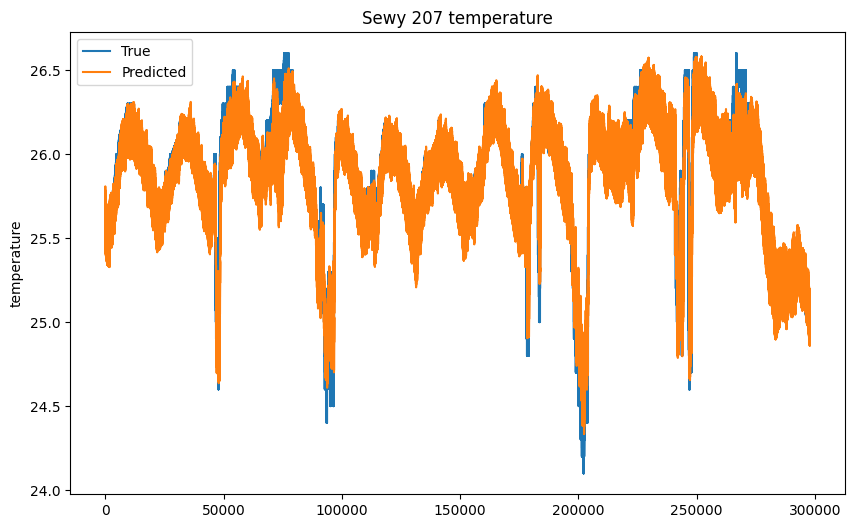

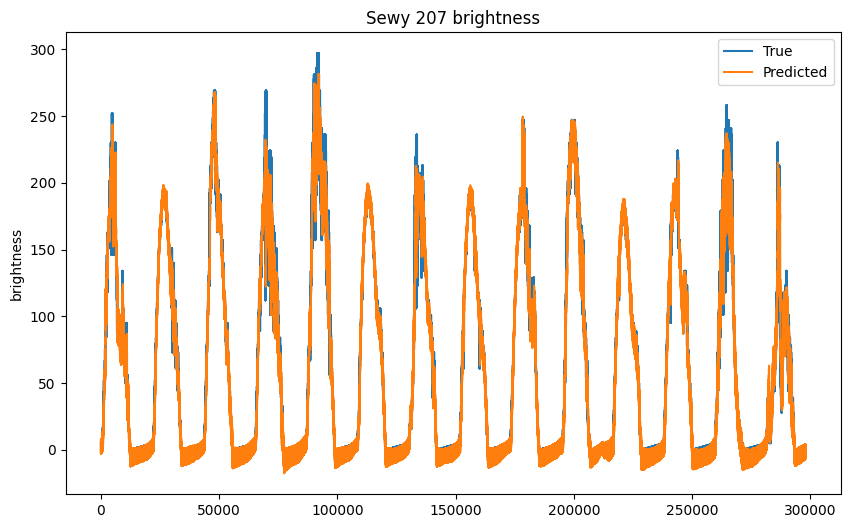

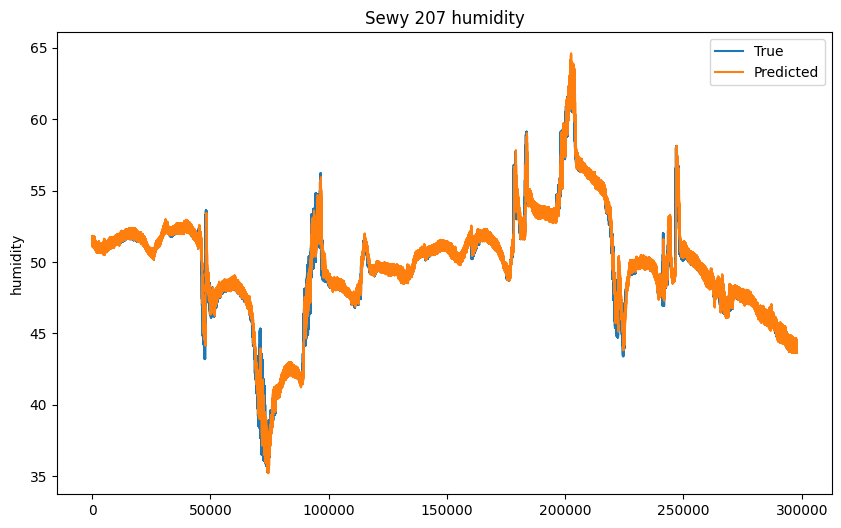

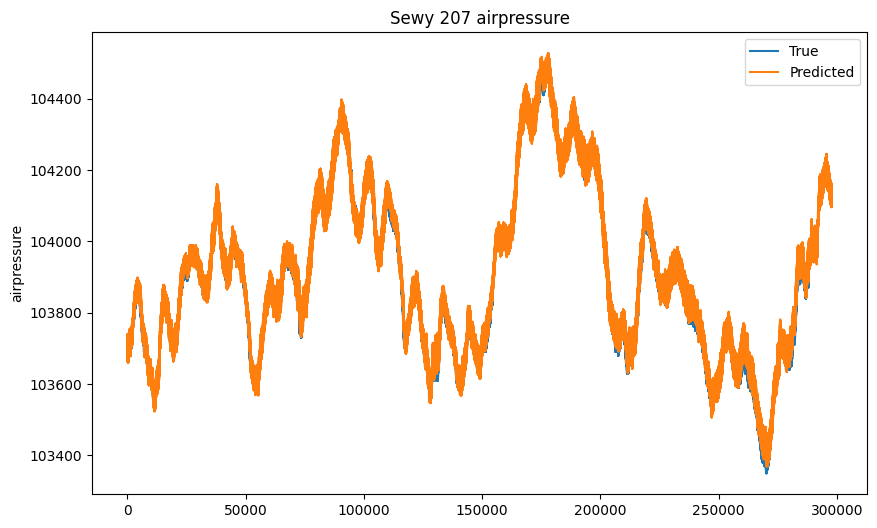

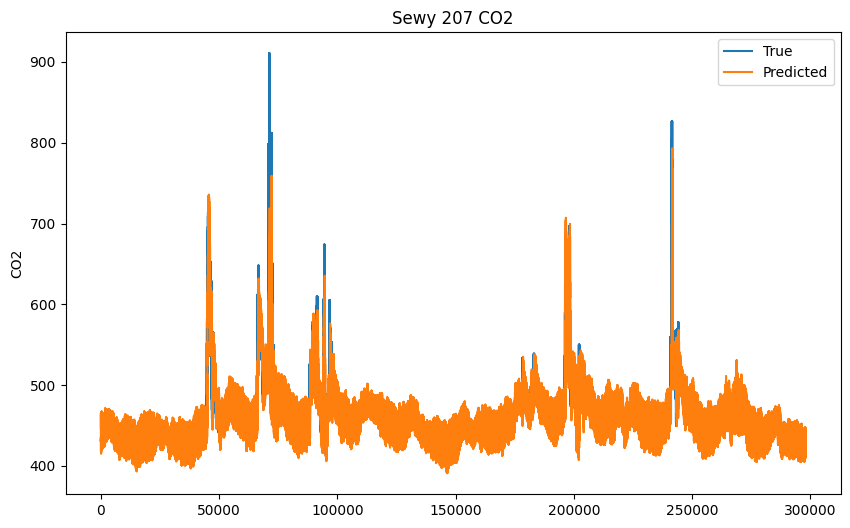

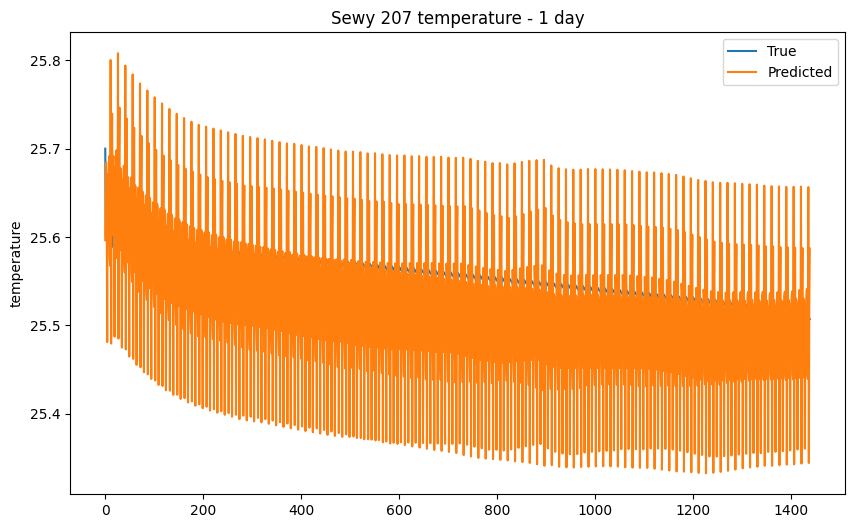

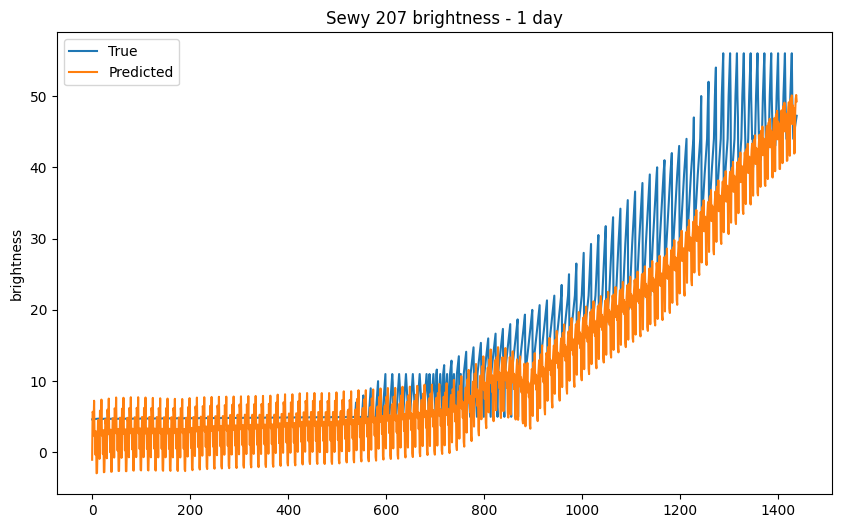

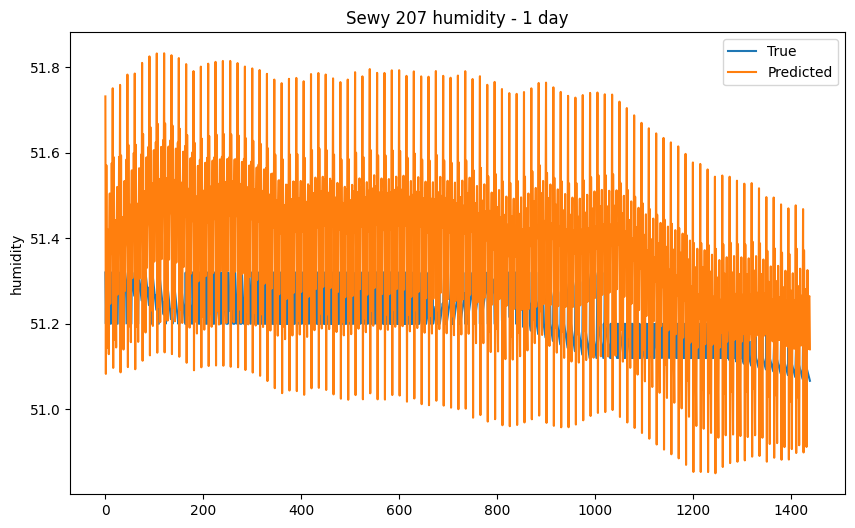

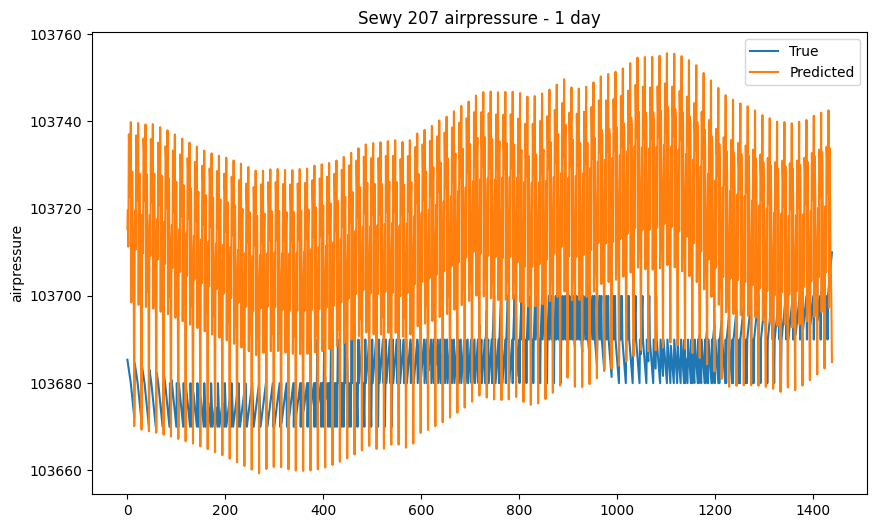

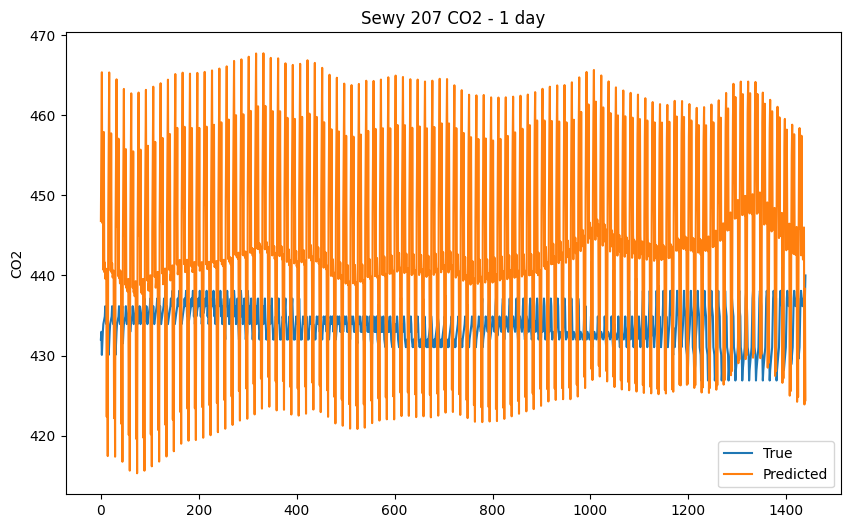

In [90]:
plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')

In [91]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_predictions(y_test, test_predictions, name):
    print(name +' - MSE:', mean_squared_error(y_test, test_predictions))
    print(name +' - MAE:', mean_absolute_error(y_test, test_predictions))
    print(name +' - RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
    
evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')

temperature - MSE: 0.02504315239508348
temperature - MAE: 0.11643666048594513
temperature - RMSE: 0.15825028402844488
brightness - MSE: 145.9094999004827
brightness - MAE: 7.431588394076387
brightness - RMSE: 12.079300472315552
humidity - MSE: 0.34704173434601204
humidity - MAE: 0.3606319297089891
humidity - RMSE: 0.5891024820402746
airpressure - MSE: 1082.1457139064746
airpressure - MAE: 26.881302823503734
airpressure - RMSE: 32.895983248817394
CO2 - MSE: 381.604060302162
CO2 - MAE: 13.227180633106455
CO2 - RMSE: 19.534688641034492


### Multistep / Predecir valores dentro de 60 minutos

Evaluamos para 60 minutos, 360 minutos y 720 minutos

In [92]:
horizons = [60, 360, 720]

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0232 - mean_absolute_error: 0.0852 - root_mean_squared_error: 0.1367 - val_loss: 0.0012 - val_mean_absolute_error: 0.0197 - val_root_mean_squared_error: 0.0347
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.1002e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0302 - val_loss: 0.0011 - val_mean_absolute_error: 0.0171 - val_root_mean_squared_error: 0.0331
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.5970e-04 - mean_absolute_error: 0.0137 - root_mean_squared_error: 0.0293 - val_loss: 0.0011 - val_mean_absolute_error: 0.0190 - val_root_mean_squared_error: 0.0335
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.1696e-04 - mean_absolute_error: 0.0132 - root_mean_squared_error: 0.0286 - val_loss: 0.0011 - val_mean_absolute_error: 0.0171 - val_root_mean_squared_error: 0.0326
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.9346e-04 - mean_absolute_err

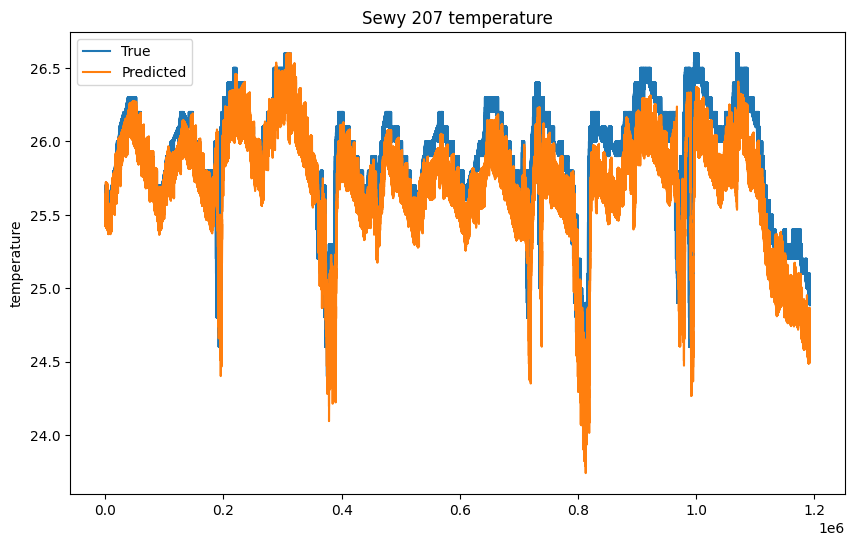

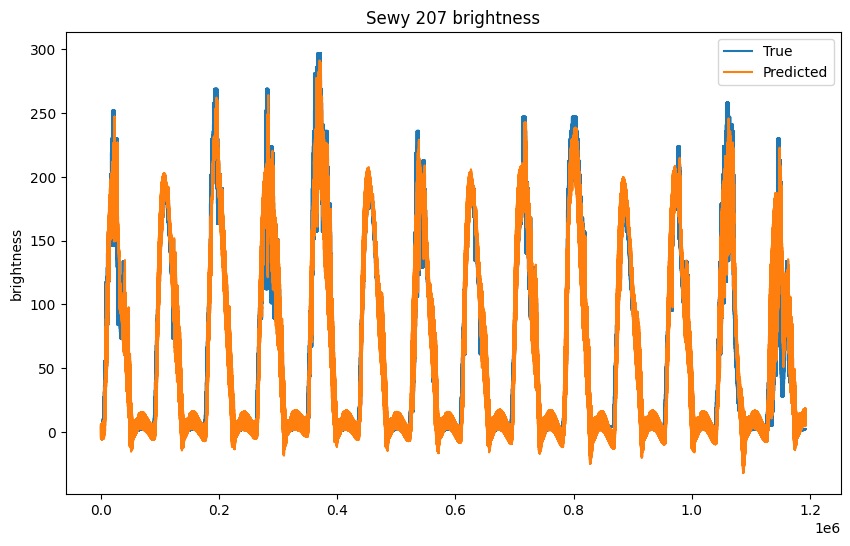

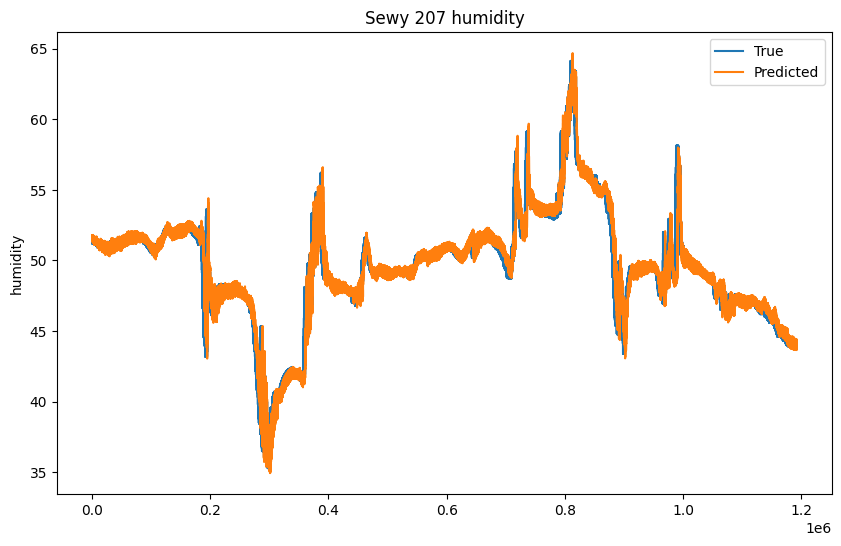

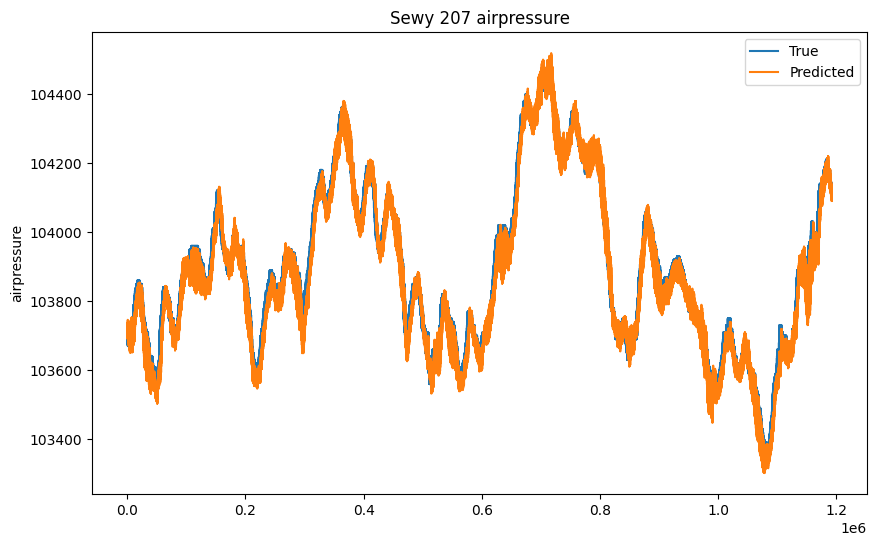

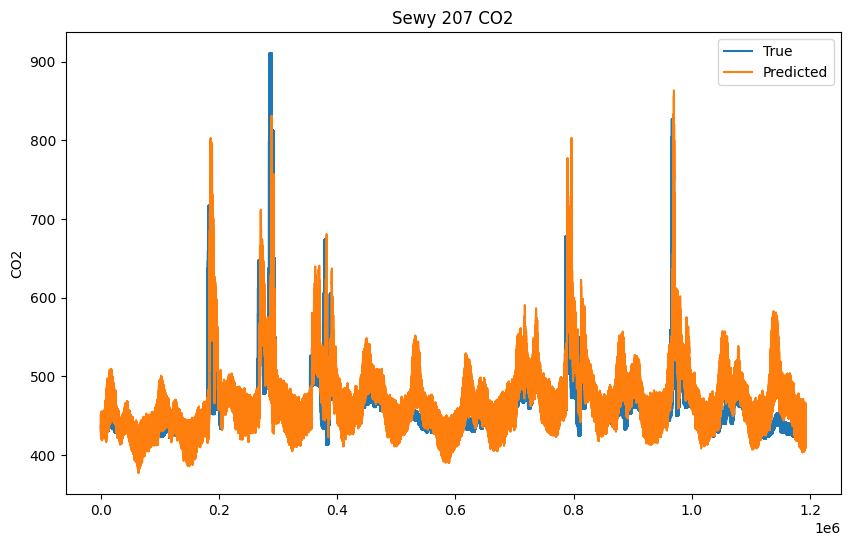

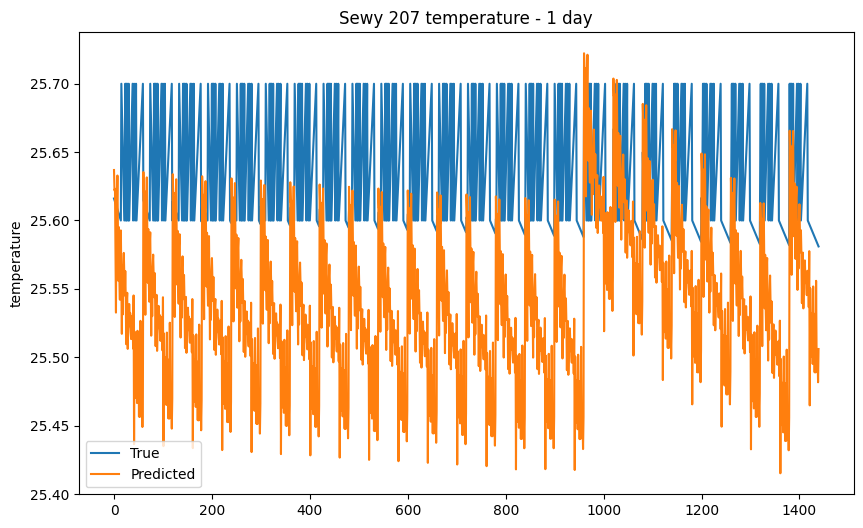

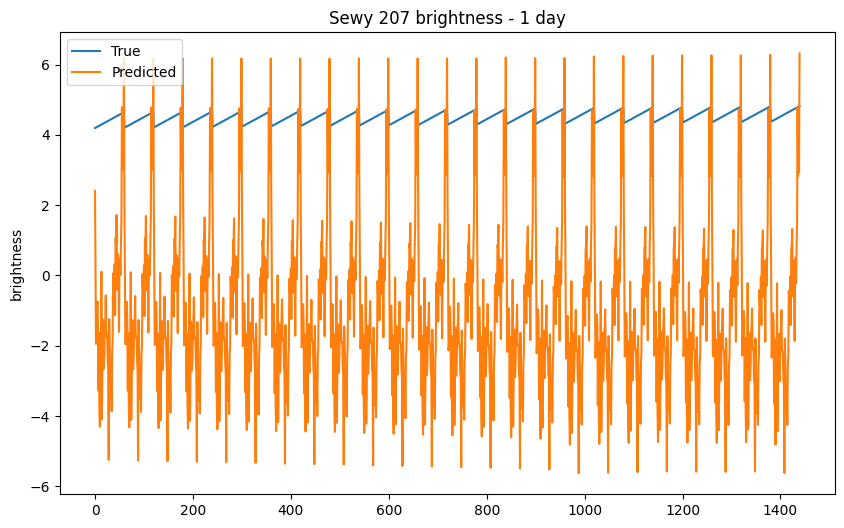

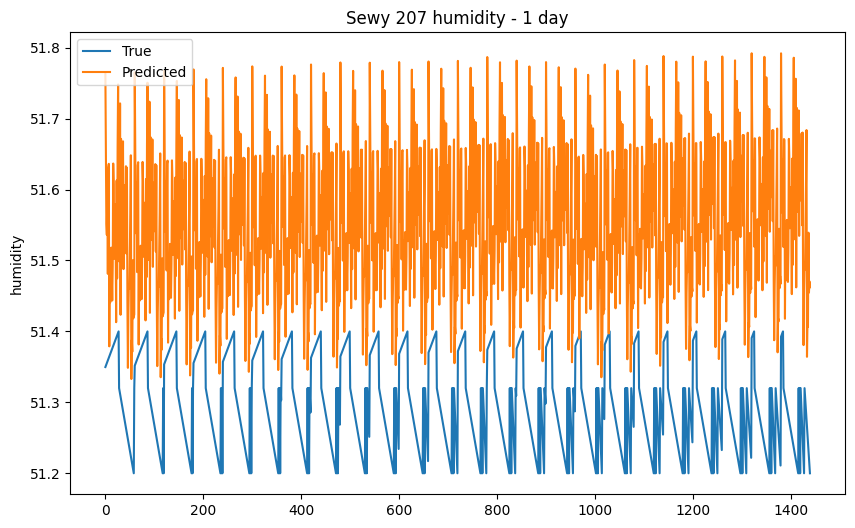

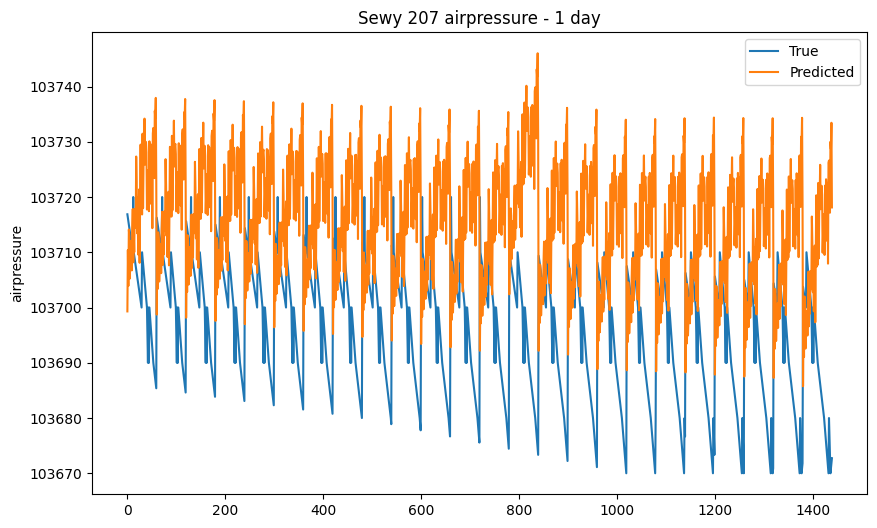

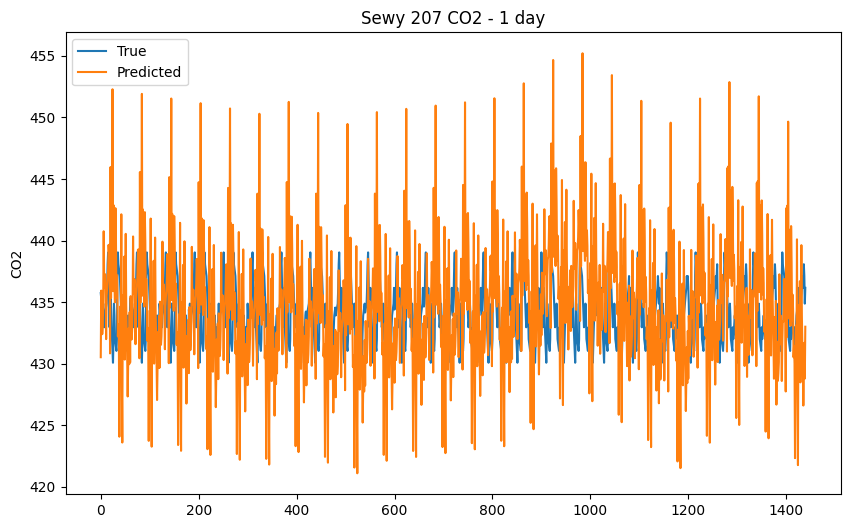

temperature - MSE: 0.08306997357560739
temperature - MAE: 0.23508351589974974
temperature - RMSE: 0.2882186211465307
brightness - MSE: 319.97402197487617
brightness - MAE: 11.139860955016596
brightness - RMSE: 17.887817697384893
humidity - MSE: 0.8198414495738676
humidity - MAE: 0.48450310645952477
humidity - RMSE: 0.9054509647539548
airpressure - MSE: 1062.9628179872657
airpressure - MAE: 25.1236542695698
airpressure - RMSE: 32.60311055692793
CO2 - MSE: 1226.8922686356973
CO2 - MAE: 22.588228657489292
CO2 - RMSE: 35.027021977834444
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0246 - mean_absolute_error: 0.0928 - root_mean_squared_error: 0.1432 - val_loss: 0.0035 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0589
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0322 - root_mean_squared_error: 0.0561 - val_loss: 0.0033 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0571
Epoch 3/20
19

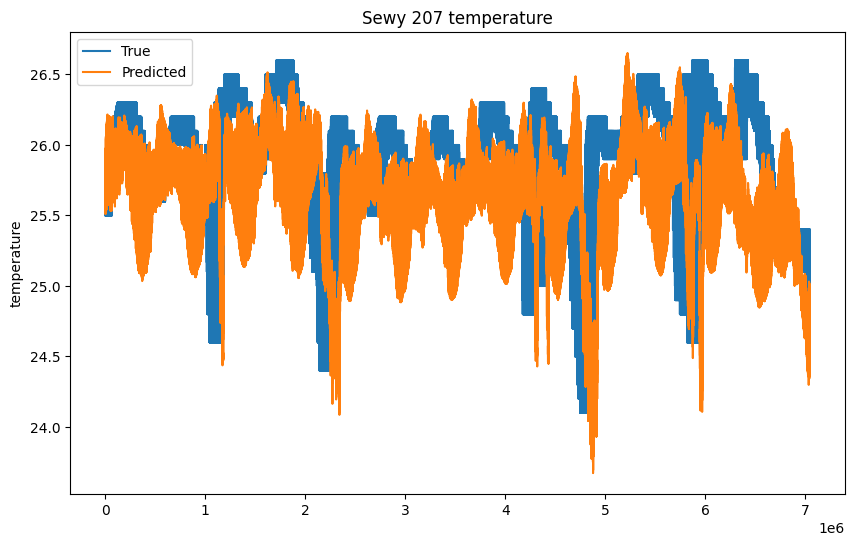

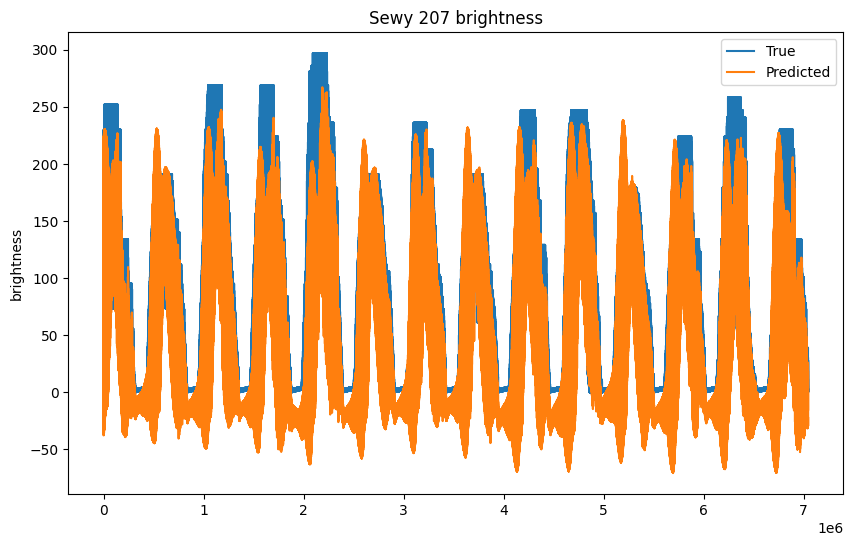

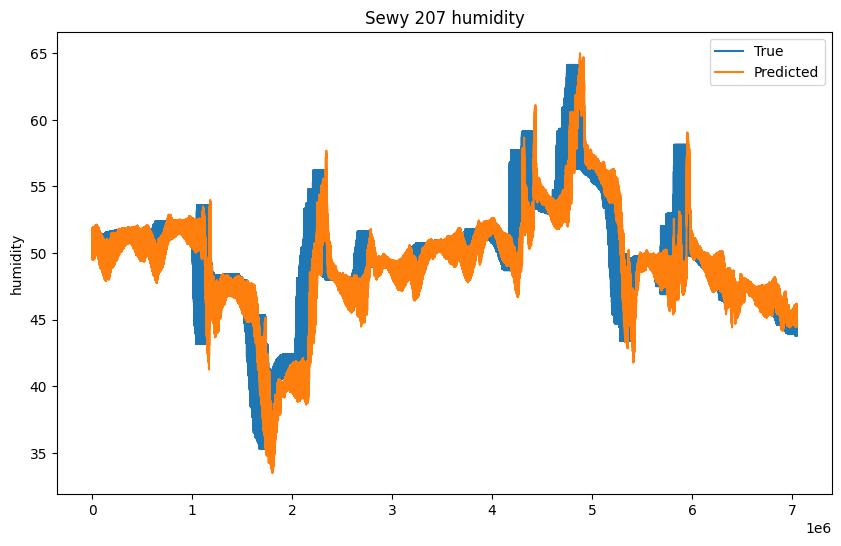

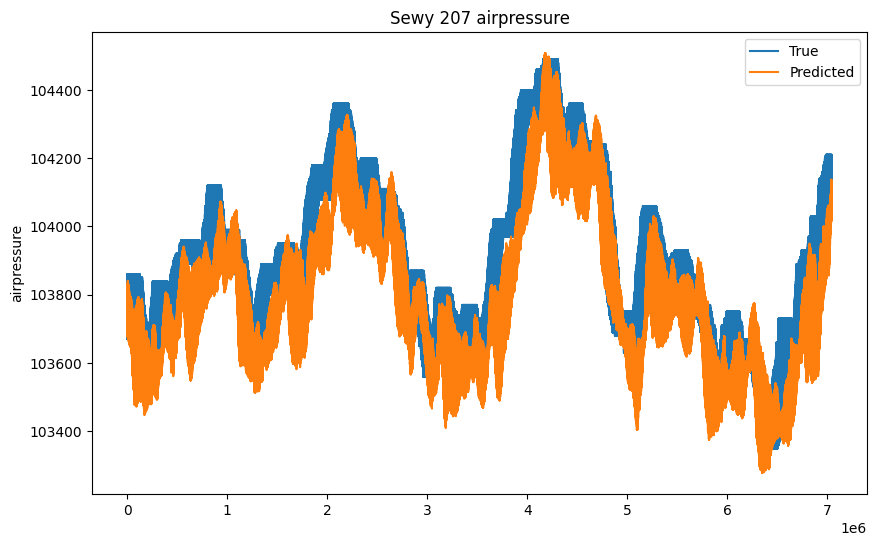

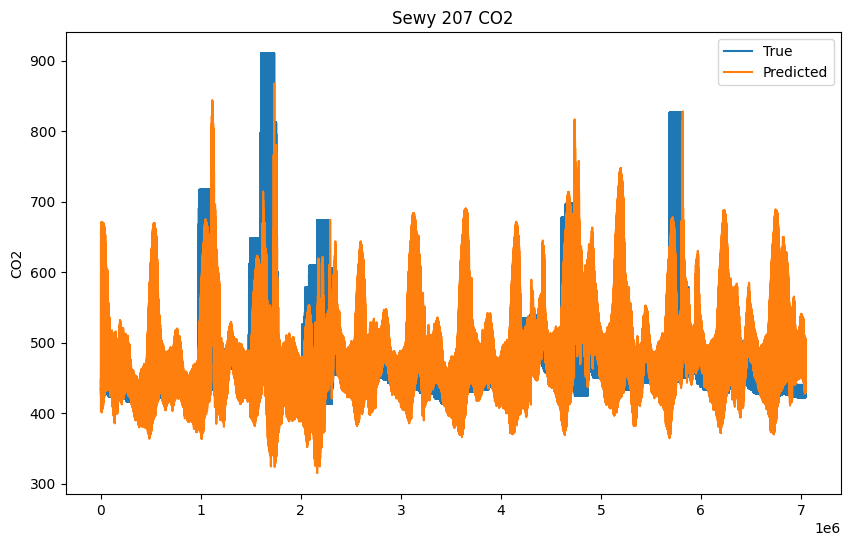

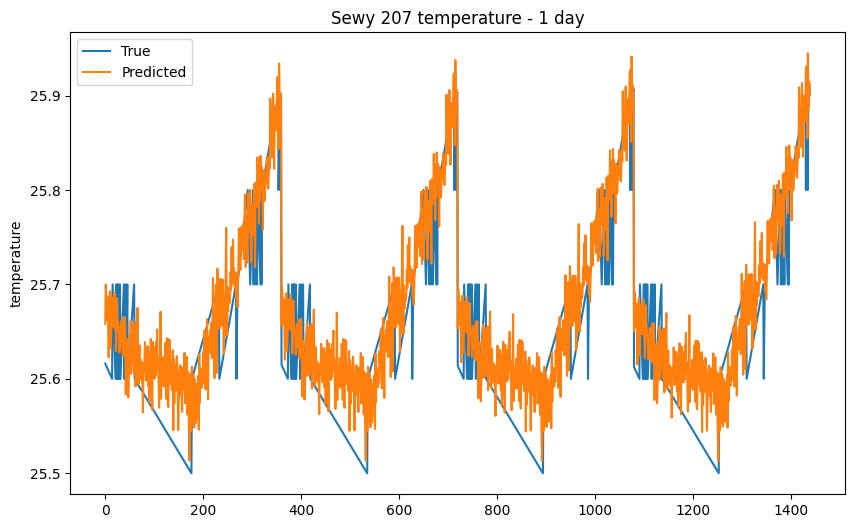

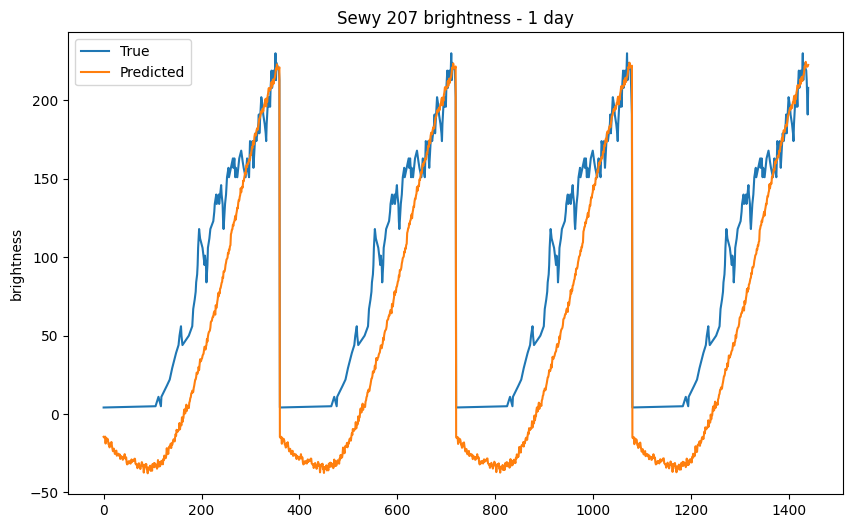

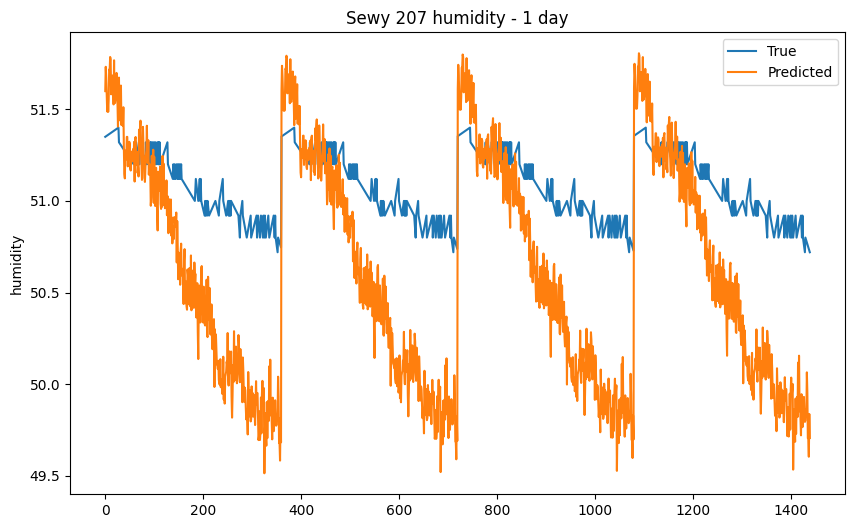

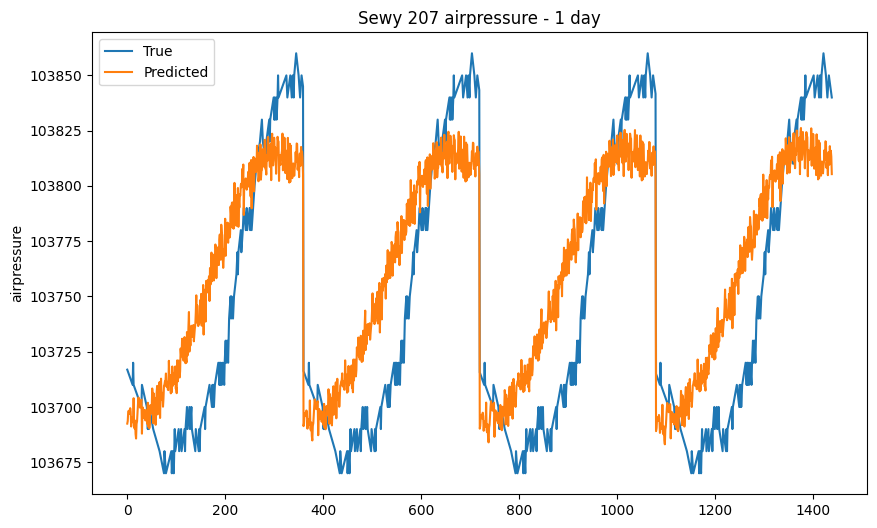

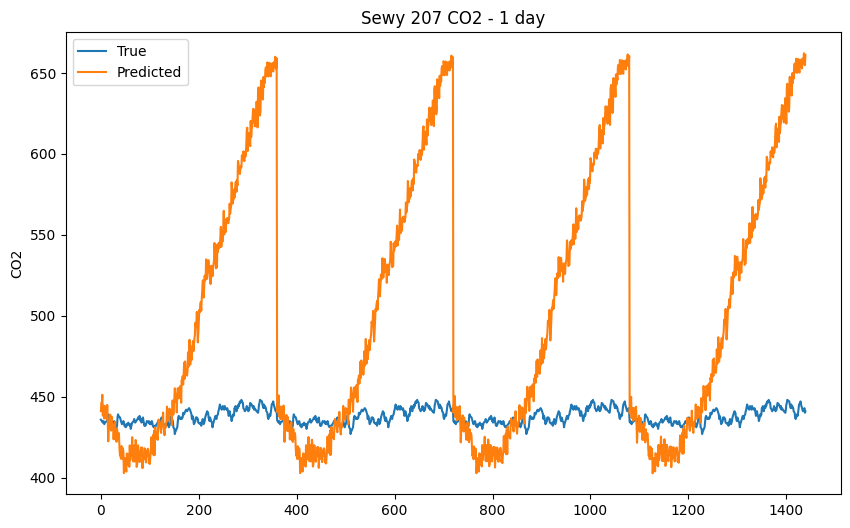

temperature - MSE: 0.291227615011026
temperature - MAE: 0.4196782365251238
temperature - RMSE: 0.5396550889327608
brightness - MSE: 1333.0150828477674
brightness - MAE: 29.408351850082425
brightness - RMSE: 36.51047908269306
humidity - MSE: 4.744986515342005
humidity - MAE: 1.3394093822787165
humidity - RMSE: 2.1782989958547945
airpressure - MSE: 16957.2259674112
airpressure - MAE: 105.33096105727265
airpressure - RMSE: 130.21991386654807
CO2 - MSE: 3773.7632939125906
CO2 - MAE: 43.258297604795786
CO2 - RMSE: 61.43096364141287
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0268 - mean_absolute_error: 0.1021 - root_mean_squared_error: 0.1515 - val_loss: 0.0061 - val_mean_absolute_error: 0.0565 - val_root_mean_squared_error: 0.0783
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0046 - mean_absolute_error: 0.0422 - root_mean_squared_error: 0.0676 - val_loss: 0.0050 - val_mean_absolute_error: 0.0506 - val_root_mean_squared_error: 0.0710
Epoch 3/20
1986/198

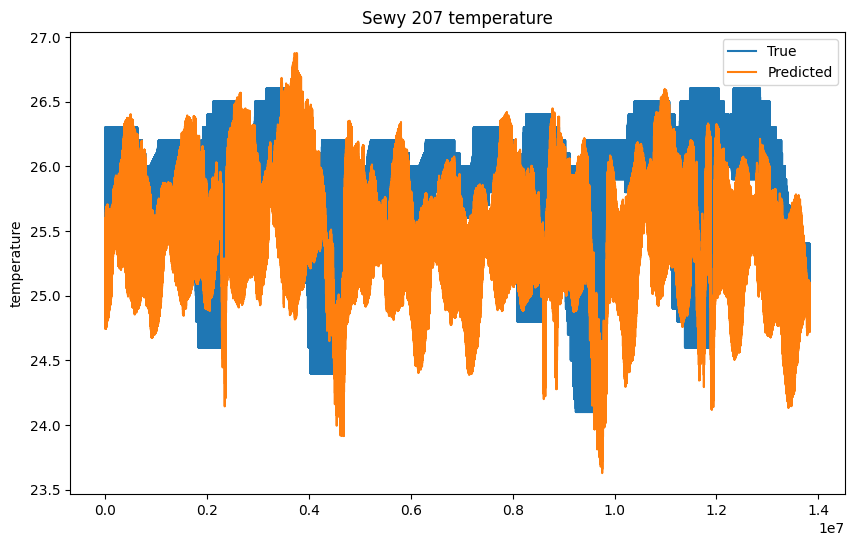

c:\Users\IvO\Desktop\testGit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


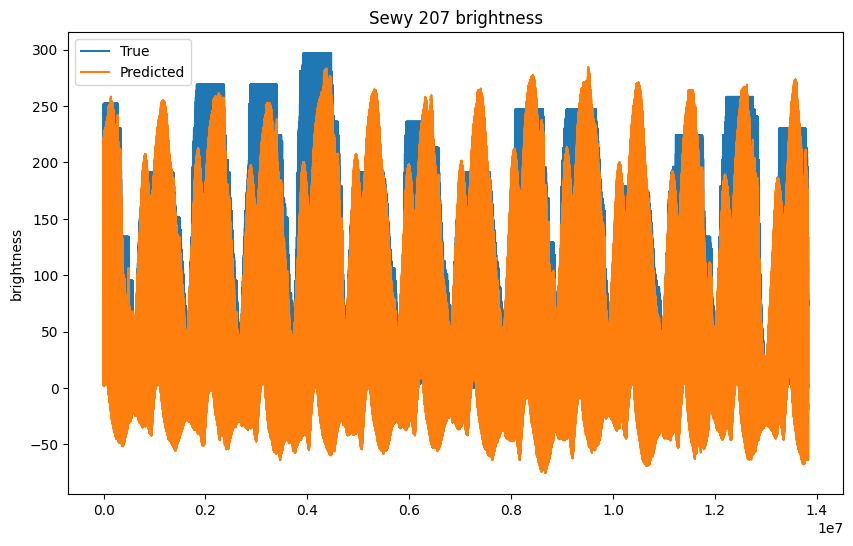

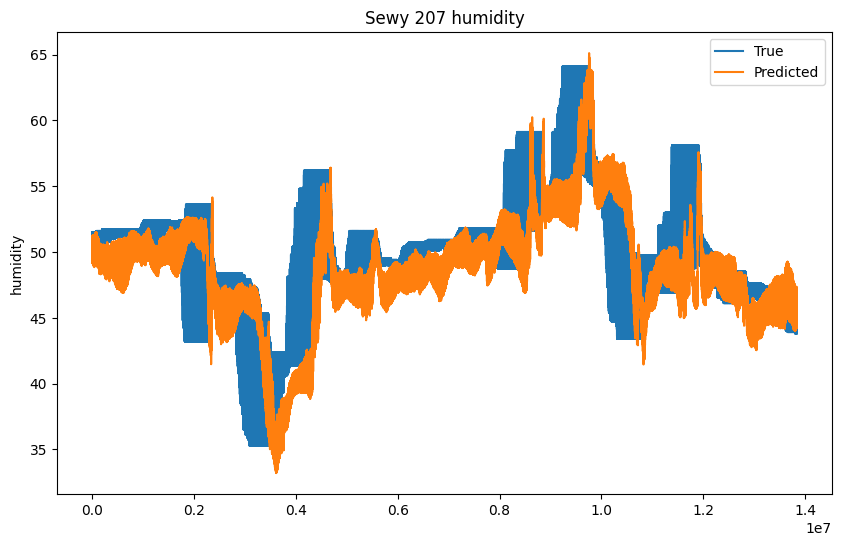

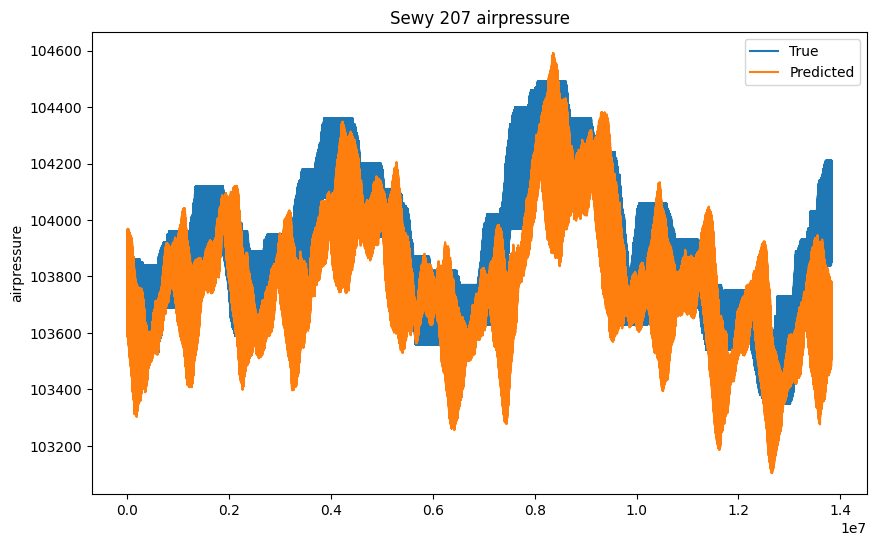

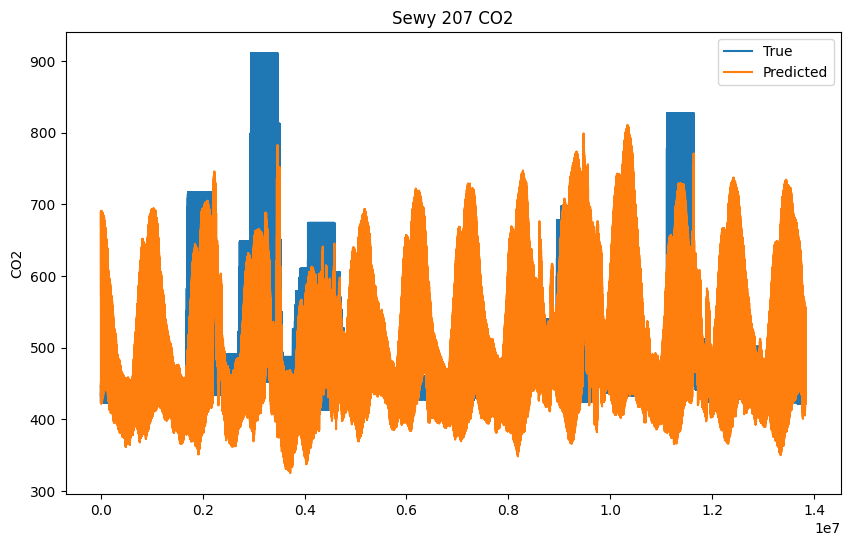

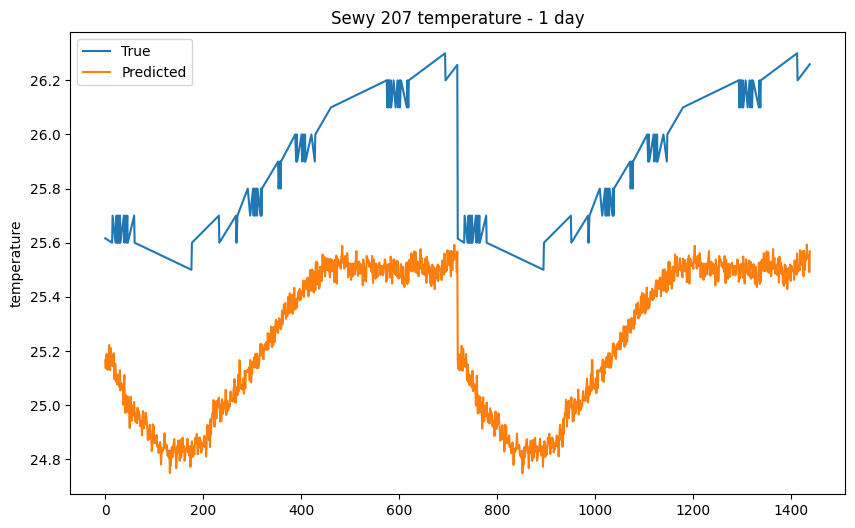

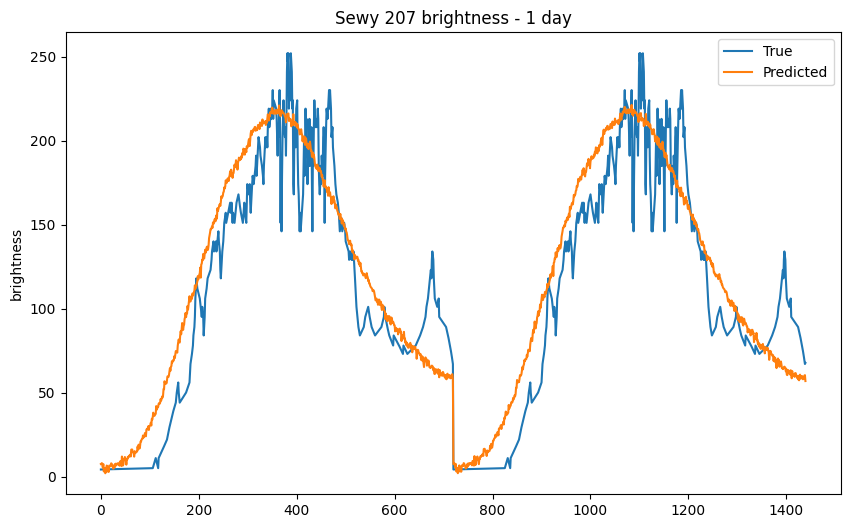

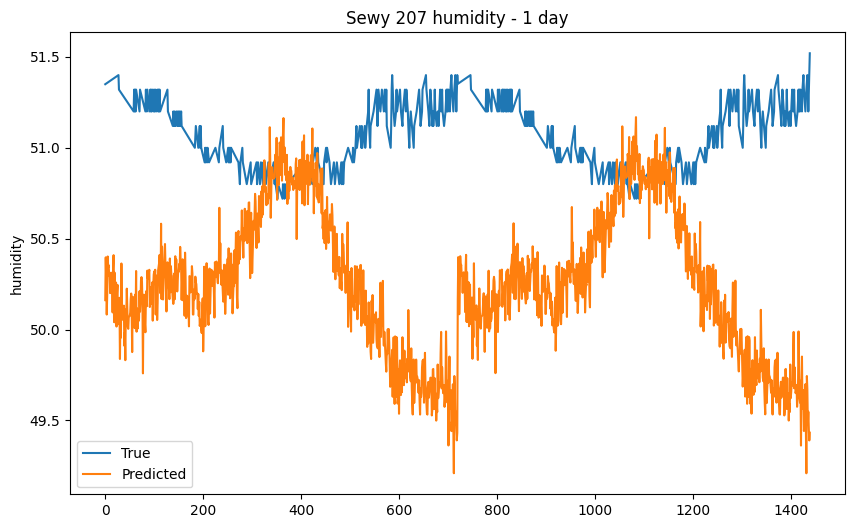

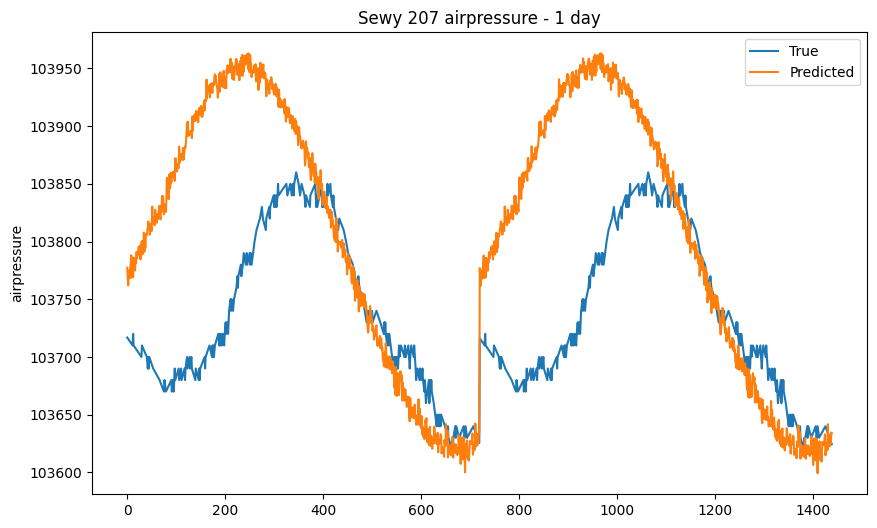

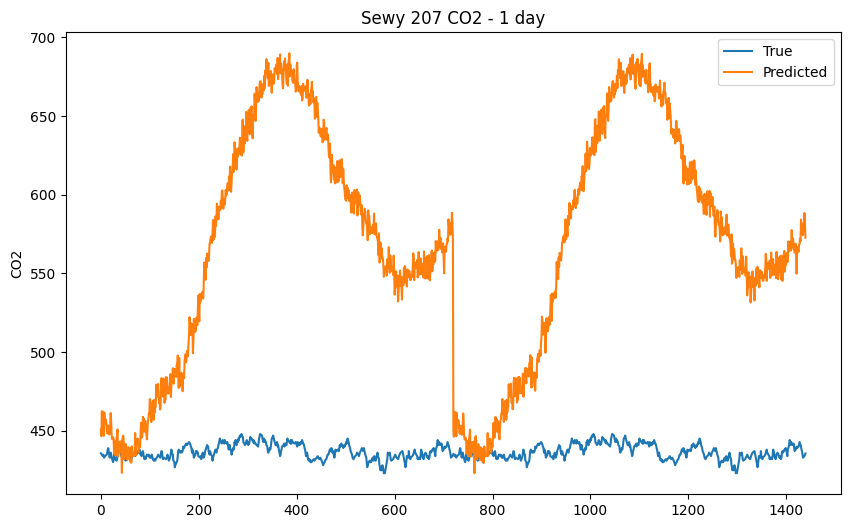

temperature - MSE: 0.45125501580968697
temperature - MAE: 0.577905551736066
temperature - RMSE: 0.671755175498996
brightness - MSE: 1913.4876618947105
brightness - MAE: 34.70920486305472
brightness - RMSE: 43.74342992832993
humidity - MSE: 8.807505253945394
humidity - MAE: 2.145739211146695
humidity - RMSE: 2.967744135525398
airpressure - MSE: 37379.63245626576
airpressure - MAE: 146.51191185264167
airpressure - RMSE: 193.33812985612994
CO2 - MSE: 8150.448751980648
CO2 - MAE: 65.56628880867156
CO2 - RMSE: 90.27983579947767


In [93]:
for horizon in horizons:
    X, y = split_sequence(completed_df, 1, horizon)
    X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
    y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

    HandMadeLSTM = Sequential()
    HandMadeLSTM.add(InputLayer((1, len(completed_df.columns))))
    HandMadeLSTM.add(LSTM(64, activation='relu'))
    HandMadeLSTM.add(Dense(horizon*(len(completed_df.columns)-4)))

    modelPath = f'../LSMTTensorflow/bestModel_sewy_207_{horizon}.keras'
    checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
    HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

    HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

    HandMadeLSTM = load_model(modelPath)

    test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(HandMadeLSTM.predict(X_test), y_test)
    
    plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

    plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')
    
    evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')
    
    

In [94]:
# Guardamos los datos necesarios para transformar los datos de normalización a los datos originales
dump(scaler_temperature, open('scalers/sewy/scaler_temperature_sewy_207.pkl', 'wb'))
dump(scaler_brightness, open('scalers/sewy/scaler_brightness_sewy_207.pkl', 'wb'))
dump(scaler_humidity, open('scalers/sewy/scaler_humidity_sewy_207.pkl', 'wb'))
dump(scaler_airpressure, open('scalers/sewy/scaler_airpressure_sewy_207.pkl', 'wb'))
dump(scaler_co2, open('scalers/sewy/scaler_co2_sewy_207.pkl', 'wb'))


In [95]:
scaler_temperature.data_max_, scaler_brightness.data_max_, scaler_humidity.data_max_, scaler_airpressure.data_max_, scaler_co2.data_max_, scaler_temperature.data_min_, scaler_brightness.data_min_, scaler_humidity.data_min_, scaler_airpressure.data_min_, scaler_co2.data_min_

(array([26.6]),
 array([386.88]),
 array([64.12]),
 array([104830.]),
 array([1690.88]),
 array([17.9]),
 array([0.]),
 array([31.6]),
 array([102930.]),
 array([392.96]))